# 1. Import Libraries and Setup

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                            precision_recall_fscore_support, roc_auc_score, roc_curve)
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


# 2. Data Loading and Initial Exploration

In [14]:
# Load the data from the provided CSV text
df=pd.read_csv(r"D:\Tourism_Reviews_Sentiment_App\Try_LLM_Integration\mental_health_app\data\Data.csv")


# Basic information about the dataset
print("📊 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Number of participants: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

# Display first few rows
print("\n📋 First 5 rows:")
df.head()

📊 Dataset Overview:
Shape: (237, 71)
Number of participants: 237
Number of features: 71

📋 First 5 rows:


,Age,Gender,Current place,previous place before war,Study Degree,study status,Marital status of family (parents),job before war,job currently,Who do you currently live with?,...,get into fights,difficult follow rules,good workings,theraby help,why no,Needs type,Depression,Anxiety,Personally Disorder,PTSD
0,36,Female,Another Country,city,Graduate Studies (Master's/Doctorate),finished,both died,Government,home woman,Other,...,yes,no,Talking ;Worships,"no, not need",no need;self independent,Stability in my home,Mild Depression,None-Menimal,Not affected,PTSD
1,24,Female,Another place in sudan,village,Bachelor's degree,finished,both live together,not worked,Other,with parents,...,no,no,Talking ;Worships;hobbies;nature;Avoid thinkin...,"no, but need",self independent,NaN,Mild Depression,Mild Anxiety,Not affected,PTSD
2,20,Female,Another place in sudan,city,Secondary,continue,both live together,Student,Student,with parents,...,yes,yes,Worships;Avoid thinking;sleep;sedative medicat...,"no, not need",self independent,Emotional support,Moderately severe Depression,Severe Anxiety,Affected,PTSD
3,40,Female,Another Country,city,Graduate Studies (Master's/Doctorate),paused for war,one die,Student,home woman,Other,...,yes,yes,Talking ;Worships;hobbies;problem solving;Avoi...,"no, not need",no need;Other,Financial support for my studies,Mild Depression,Mild Anxiety,Affected,PTSD
4,33,Male,same place,city,Graduate Studies (Master's/Doctorate),finished,both live together,Freelance,Freelance,with parents,...,no,no,Worships,"no, not need",no need,Financial support,None-Minimal,None-Menimal,Not affected,Not affected


In [15]:
# Dataset info
print("📋 Dataset Information:")
print(df.info())

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 71 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 237 non-null    int64 
 1   Gender                              237 non-null    object
 2    Current place                      237 non-null    object
 3   previous place before war           237 non-null    object
 4   Study Degree                        237 non-null    object
 5   study status                        237 non-null    object
 6   Marital status of family (parents)  237 non-null    object
 7   job before war                      237 non-null    object
 8   job currently                       237 non-null    object
 9    Who do you currently live with?    237 non-null    object
 10  income level before war             237 non-null    object
 11  income level after war             

# 3. Data Cleaning and Preprocessing

In [16]:
print("🧹 Data Cleaning Phase:")

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()
print(f"✅ Column names cleaned: {len(df.columns)} columns")

# Check for missing values
print(f"\n🔍 Missing Values Analysis:")
missing_values = df.isnull().sum()
print(f"Total missing values: {missing_values.sum()}")

print(f"Total missing values after fillna: {df['Needs type'].dropna()}")
print(f"Total missing values: {missing_values.sum()}")

if missing_values.sum() > 0:
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("✅ No missing values found!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate rows: {duplicates}")

# Basic statistics for numerical columns
print(f"\n📈 Descriptive Statistics:")
print(df.describe(include='all'))


🧹 Data Cleaning Phase:
✅ Column names cleaned: 71 columns

🔍 Missing Values Analysis:
Total missing values: 12
Total missing values after fillna: 0                                   Stability in my home
2                                      Emotional support
3                       Financial support for my studies
4                                      Financial support
6                                     I need a therapist
                             ...                        
232    We need to be merciful to one another, and if ...
233                                    Emotional support
234                         I need my family and friends
235    Everyone should mind their own business and pr...
236                      Financial and emotional support
Name: Needs type, Length: 225, dtype: object
Total missing values: 12
Columns with missing values:
Needs type    12
dtype: int64

🔄 Duplicate rows: 0

📈 Descriptive Statistics:
               Age  Gender    Current place previo

# 4. Exploratory Data Analysis (EDA)

In [17]:
print("📊 Exploratory Data Analysis:")

# Define target variables (mental health outcomes)
target_columns = ['Depression', 'Anxiety', 'Personally Disorder', 'PTSD']

print(f"\n🎯 Target Variables Analysis:")
for target in target_columns:
    if target in df.columns:
        print(f"\n{target}:")
        value_counts = df[target].value_counts()
        print(value_counts)
        
        # Calculate affected rate (non-minimal/none cases)
        affected_rate = (df[target] != 'None-Minimal').sum() / len(df) * 100
        print(f"Affected rate: {affected_rate:.1f}%")

📊 Exploratory Data Analysis:

🎯 Target Variables Analysis:

Depression:
Depression
Moderate Depression              65
Mild Depression                  59
Moderately severe Depression     52
Severe Depression                34
None-Minimal                     27
Name: count, dtype: int64
Affected rate: 88.6%

Anxiety:
Anxiety
Mild Anxiety        66
Moderate Anxiety    63
Severe Anxiety      59
None-Menimal        49
Name: count, dtype: int64
Affected rate: 100.0%

Personally Disorder:
Personally Disorder
Affected        120
Not affected    117
Name: count, dtype: int64
Affected rate: 100.0%

PTSD:
PTSD
PTSD                 124
Subthreshold PTSD     67
Not affected          46
Name: count, dtype: int64
Affected rate: 100.0%


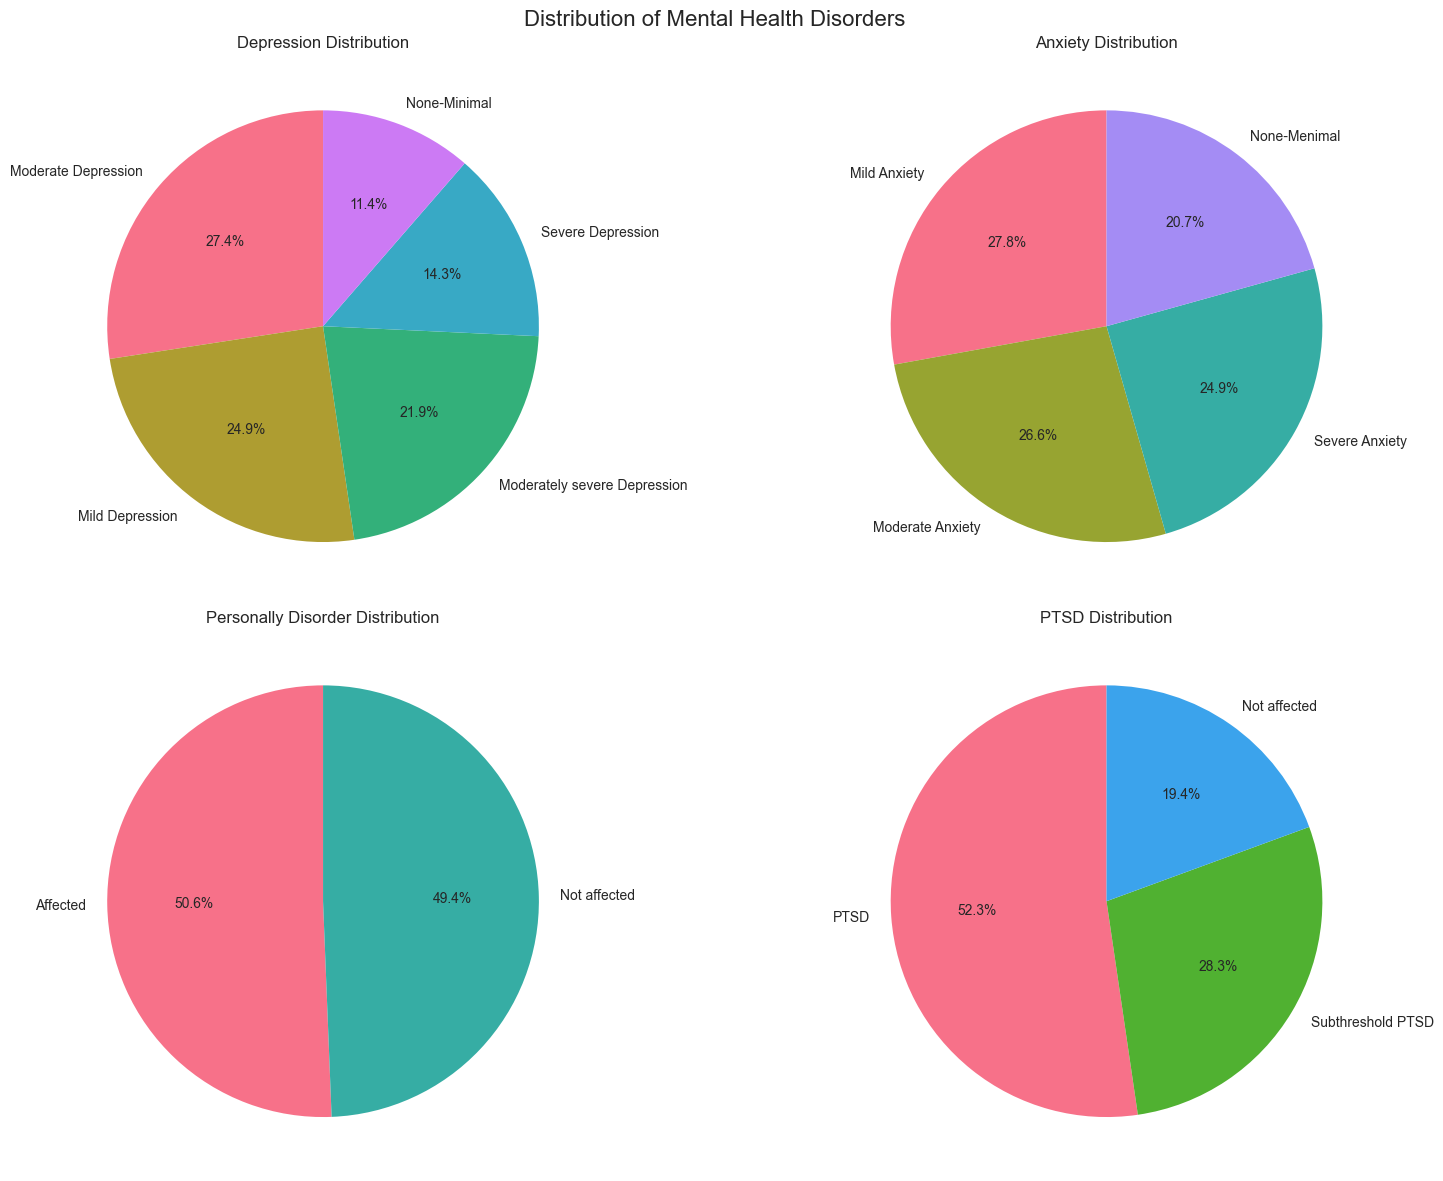

In [18]:
# Visualize target variable distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Mental Health Disorders', fontsize=16, y=0.98)

for i, target in enumerate(target_columns):
    if target in df.columns:
        ax = axes[i//2, i%2]
        value_counts = df[target].value_counts()
        
        # Create a pie chart for better visualization
        ax.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=sns.color_palette("husl", len(value_counts)))
        ax.set_title(f'{target} Distribution', fontsize=12)

plt.tight_layout()
plt.show()

In [19]:
# Demographic Analysis
print(f"\n👥 Demographic Analysis:")

# Gender distribution
print("Gender Distribution:")
gender_dist = df['Gender'].value_counts()
print(gender_dist)
print(f"Female percentage: {(df['Gender'] == 'Female').mean()*100:.1f}%")

# Age statistics
print(f"\nAge Distribution:")
print(f"Mean age: {df['Age'].mean():.1f} years")
print(f"Median age: {df['Age'].median():.1f} years")
print(f"Age range: {df['Age'].min()} - {df['Age'].max()} years")
print(f"Standard deviation: {df['Age'].std():.1f} years")


👥 Demographic Analysis:
Gender Distribution:
Gender
Female    155
Male       82
Name: count, dtype: int64
Female percentage: 65.4%

Age Distribution:
Mean age: 28.2 years
Median age: 27.0 years
Age range: 12 - 55 years
Standard deviation: 7.3 years


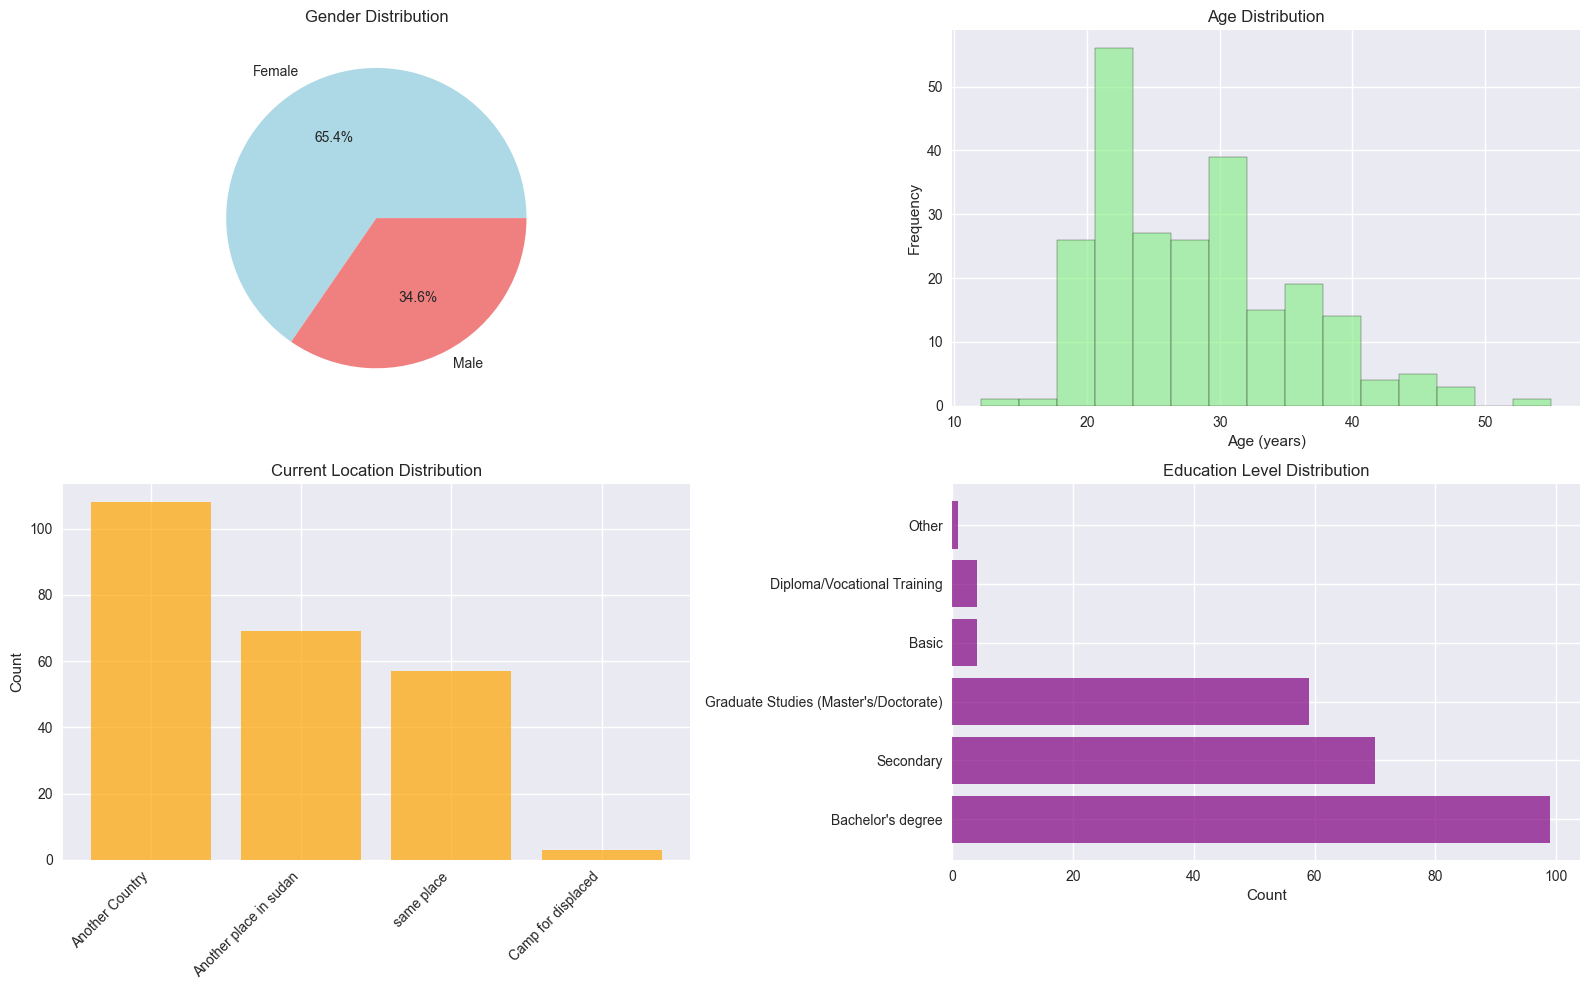

In [20]:
# Demographic visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[0,0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
              colors=['lightblue', 'lightcoral'])
axes[0,0].set_title('Gender Distribution')

# Age distribution
axes[0,1].hist(df['Age'], bins=15, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0,1].set_title('Age Distribution')
axes[0,1].set_xlabel('Age (years)')
axes[0,1].set_ylabel('Frequency')

# Current location
location_counts = df['Current place'].value_counts()
axes[1,0].bar(range(len(location_counts)), location_counts.values, 
              color='orange', alpha=0.7)
axes[1,0].set_xticks(range(len(location_counts)))
axes[1,0].set_xticklabels(location_counts.index, rotation=45, ha='right')
axes[1,0].set_title('Current Location Distribution')
axes[1,0].set_ylabel('Count')

# Education level
edu_counts = df['Study Degree'].value_counts()
axes[1,1].barh(range(len(edu_counts)), edu_counts.values, color='purple', alpha=0.7)
axes[1,1].set_yticks(range(len(edu_counts)))
axes[1,1].set_yticklabels(edu_counts.index)
axes[1,1].set_title('Education Level Distribution')
axes[1,1].set_xlabel('Count')

plt.tight_layout()
plt.show()

# 5. Feature Engineering

In [21]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 35)]



In [22]:
print("⚙️ Feature Engineering Phase:")

# Create a working copy
df_processed = df.copy()

print(f"\n🔄 Converting categorical variables to numerical:")

# Mapping dictionaries for ordinal variables
severity_mapping = {
    'never': 0, 'few times': 1, 'sometimes': 2, 'many times': 3, 'very much': 4,
    'Always': 5, 'Very much': 5,
    'Not difficult': 1, 'Difficult': 3, 'Very Difficult': 4, 'Extremely difficult': 5,
    'None-Minimal': 0, 'None-Menimal': 0,  # Handle typo in data
    'Mild Depression': 1, 'Moderate Depression': 2, 'Moderately severe Depression': 3, 'Severe Depression': 4,
    'Mild Anxiety': 1, 'Moderate Anxiety': 2, 'Severe Anxiety': 3,
    'Not affected': 0, 'Affected': 1, 'PTSD': 1, 'Subthreshold PTSD': 0
}

income_mapping = {'very low': 1, 'low': 2, 'medium': 3, 'high': 4}
yes_no_mapping = {'yes': 1, 'no': 0}

# Apply mappings
print("📝 Processing binary variables (yes/no)...")
yes_no_columns = ['leave home for war', 'witnessed direct violence', 'hurt or relatives hard', 
                 'lost persons', 'you arrested', 'Lack of food or medicine', 
                 'Your property destroyed', 'felt afraid for lossing life']

for col in yes_no_columns:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map(yes_no_mapping)

print("💰 Processing income variables...")
for col in ['income level before war', 'income level after war']:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map(income_mapping)

print("📊 Processing severity/frequency variables...")
# Process columns that contain severity or frequency responses
for col in df_processed.columns:
    if df_processed[col].dtype == 'object':
        # Check if column contains severity-type responses
        unique_vals = df_processed[col].unique()
        if any(val in str(unique_vals) for val in ['never', 'few times', 'sometimes', 'Difficult']):
            # Apply severity mapping
            for key, value in severity_mapping.items():
                df_processed[col] = df_processed[col].replace(key, value)

# Process target variables for binary classification
print("🎯 Processing target variables...")
for target in target_columns:
    if target in df_processed.columns:
        if target == 'Depression':
            df_processed['Depression'] = df_processed['Depression'].str.strip()  # Remove extra spaces
            df_processed[target] = df_processed[target].map({
                'None-Minimal': 0,
                'Mild Depression': 1,
                'Moderate Depression': 2,
                'Moderately severe Depression': 3,
                'Severe Depression': 4
            })  

        elif target == 'Anxiety':
            df_processed[target] = df_processed[target].map({
                'None-Minimal': 0,
                'Mild Anxiety': 1,
                'Moderate Anxiety': 2,
                'Severe Anxiety': 3
            })

        elif target == 'Personally Disorder':
            df_processed[target] = df_processed[target].map({
                'Not affected': 0,
                'Affected': 1
            })

        elif target == 'PTSD':
            df_processed[target] = df_processed[target].map({
                'Not affected': 0,
                'Subthreshold PTSD': 1,
                'PTSD': 2
            })

        df_processed[target] = df_processed[target].fillna(0)
        df_processed[target] = df_processed[target].astype(int).astype("int64")

# NLP Processing for "Needs type" column using TF-IDF
print("📝 Processing 'Needs type' column with TF-IDF...")

from sklearn.feature_extraction.text import TfidfVectorizer
import re

def preprocess_text(text):
    """Clean and preprocess text data"""
    if pd.isna(text):
        return ""
    
    # Convert to string and lowercase
    text = str(text).lower()
    
    # Remove special characters and extra spaces
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

# Preprocess the Needs type column
df_processed['Needs type_cleaned'] = df_processed['Needs type'].apply(preprocess_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=20,  # Limit to top 20 features to avoid too many dimensions
    min_df=2,         # Ignore terms that appear in less than 2 documents
    max_df=0.8,       # Ignore terms that appear in more than 80% of documents
    stop_words='english',  # Remove common English stop words
    ngram_range=(1, 2)     # Consider both single words and word pairs
)

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df_processed['Needs type_cleaned'])

# Convert TF-IDF matrix to DataFrame
tfidf_features = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=[f'needs_tfidf_{feature}' for feature in tfidf_vectorizer.get_feature_names_out()],
    index=df_processed.index
)

print(f"✅ Created {tfidf_features.shape[1]} TF-IDF features from 'Needs type' column")

# Display most important terms
feature_importance = pd.DataFrame({
    'feature': tfidf_vectorizer.get_feature_names_out(),
    'importance': tfidf_matrix.mean(axis=0).A1
}).sort_values('importance', ascending=False)

print("\n📊 Top 10 most important terms in 'Needs type':")
print(feature_importance.head(10))

# Merge TF-IDF features back to the main dataframe
df_processed = pd.concat([df_processed, tfidf_features], axis=1)

# Drop the original text columns to avoid redundancy
df_processed = df_processed.drop(['Needs type', 'Needs type_cleaned', 'why no', 'good workings'], axis=1, errors='ignore')

print("✅ TF-IDF processing completed and features integrated into dataset")
print(f"📊 Final dataset shape: {df_processed.shape}")

# Display information about the processed dataset
print("\n📋 Processed dataset info:")
print(df_processed.info())

⚙️ Feature Engineering Phase:

🔄 Converting categorical variables to numerical:
📝 Processing binary variables (yes/no)...
💰 Processing income variables...
📊 Processing severity/frequency variables...
🎯 Processing target variables...
📝 Processing 'Needs type' column with TF-IDF...
✅ Created 20 TF-IDF features from 'Needs type' column

📊 Top 10 most important terms in 'Needs type':
                  feature  importance
17                support    0.172220
5               financial    0.146427
14          psychological    0.092072
6       financial support    0.083293
11                   need    0.074079
1               emotional    0.064953
9                   moral    0.052532
16  psychological support    0.044500
2       emotional support    0.041216
0                     don    0.041134
✅ TF-IDF processing completed and features integrated into dataset
📊 Final dataset shape: (201, 88)

📋 Processed dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1 to 236
Data 

In [23]:
print(df['Depression'].value_counts())
print(df_processed['Depression'].value_counts())

Depression
Moderate Depression              58
Mild Depression                  48
Moderately severe Depression     45
Severe Depression                31
None-Minimal                     19
Name: count, dtype: int64
Depression
2    58
1    48
3    45
4    31
0    19
Name: count, dtype: int64


In [24]:
# Handle remaining categorical variables with Label Encoding
print("🏷️ Label encoding remaining categorical variables...")

le = LabelEncoder()
categorical_cols = []

for col in df_processed.columns:
    if df_processed[col].dtype == 'object':
        try:
            df_processed[col] = le.fit_transform(df_processed[col].astype(str))
            categorical_cols.append(col)
        except:
            continue

print(f"✅ Encoded {len(categorical_cols)} categorical columns")

🏷️ Label encoding remaining categorical variables...
✅ Encoded 28 categorical columns


In [25]:
print("➕ Creating derived features...")

# Symptom severity score
symptom_columns = [col for col in df_processed.columns 
                  if any(word in col.lower() for word in ['feel', 'sleeping', 'eating', 'focus', 'stressed', 'tired'])]

if symptom_columns:
    # Ensure all symptom columns are numeric
    for col in symptom_columns:
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce').fillna(0)
    
    df_processed['total_symptoms_score'] = df_processed[symptom_columns].sum(axis=1)
    print(f"✅ Created total_symptoms_score from {len(symptom_columns)} columns")

# Trauma exposure score
trauma_columns = ['witnessed direct violence', 'hurt or relatives hard', 'lost persons', 
                 'you arrested', 'Your property destroyed']
trauma_available = [col for col in trauma_columns if col in df_processed.columns]

if trauma_available:
    df_processed['trauma_exposure_score'] = df_processed[trauma_available].sum(axis=1)
    print(f"✅ Created trauma_exposure_score from {len(trauma_available)} columns")

# Social support score (inverse of isolation indicators)
social_columns = ['feel alone', 'feel free to talk', 'close friends']
social_available = [col for col in social_columns if col in df_processed.columns]

if social_available:
    # For 'feel alone', higher values mean less support, so we invert it
    social_score = 0
    for col in social_available:
        if col == 'feel alone':
            social_score += (5 - df_processed[col])  # Invert the score
        else:
            social_score += df_processed[col]
    
    df_processed['social_support_score'] = social_score
    print(f"✅ Created social_support_score from {len(social_available)} columns")

print(f"\n📊 Processed dataset shape: {df_processed.shape}")


➕ Creating derived features...
✅ Created total_symptoms_score from 17 columns
✅ Created trauma_exposure_score from 5 columns
✅ Created social_support_score from 3 columns

📊 Processed dataset shape: (201, 91)


# 6. Correlation Analysis

🔗 Correlation Analysis:
✅ Working with 91 numeric features


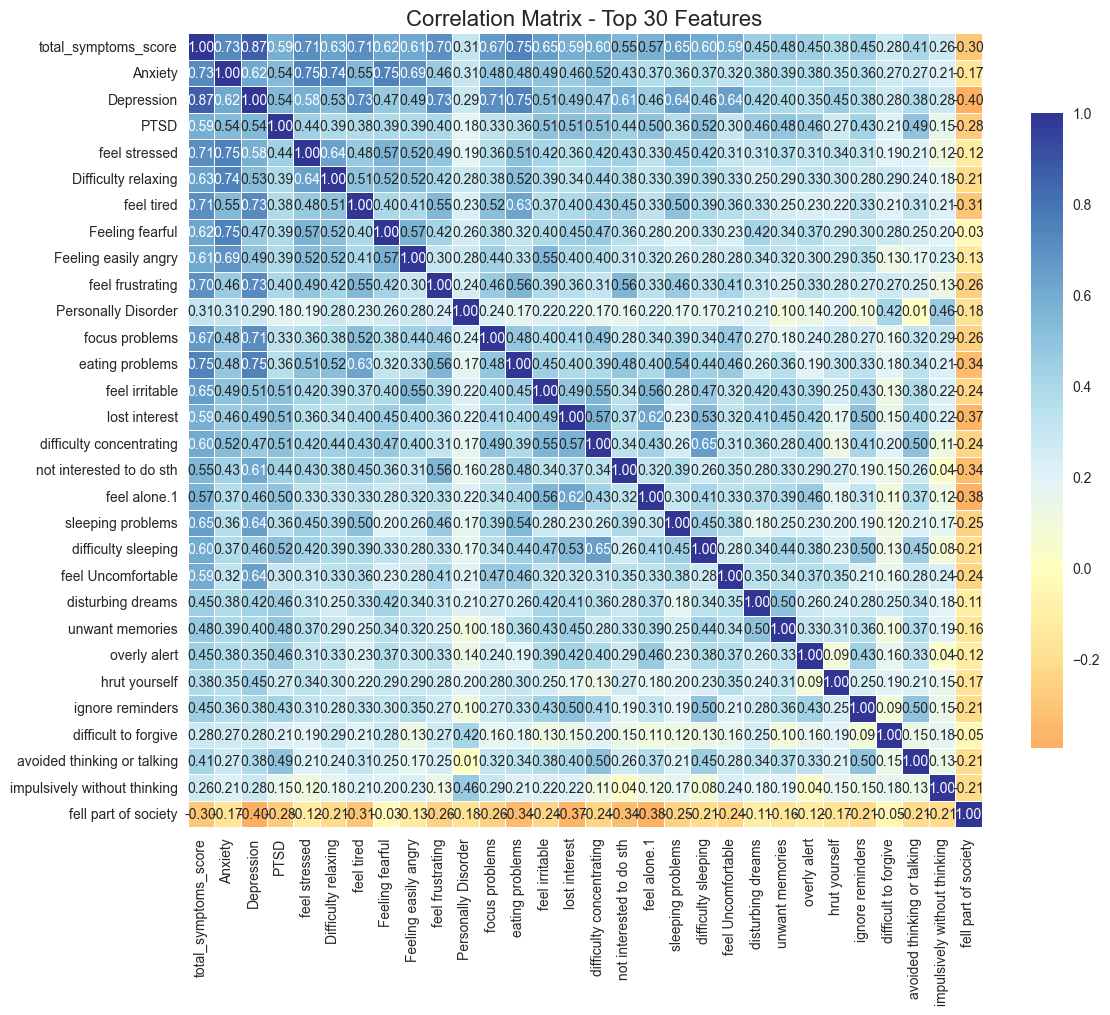

In [26]:
print("🔗 Correlation Analysis:")

# Select only numeric columns
numeric_columns = df_processed.select_dtypes(include=[np.number]).columns
df_numeric = df_processed[numeric_columns]

# Fill any remaining NaN values
df_numeric = df_numeric.fillna(df_numeric.mean())

print(f"✅ Working with {len(numeric_columns)} numeric features")

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Plot correlation heatmap for target variables
plt.figure(figsize=(12, 10))

# Create a subset focusing on target variables and top correlated features

target_corr = correlation_matrix[target_columns].abs()
top_features = target_corr.mean(axis=1).nlargest(30).index  # Top 30 features

subset_corr = correlation_matrix.loc[top_features, top_features]

sns.heatmap(subset_corr, annot=True, cmap='RdYlBu', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Correlation Matrix - Top 30 Features', fontsize=16)
plt.tight_layout()
plt.show()

In [27]:
# Analyze correlations with target variables
print(f"\n🎯 Correlations with Target Variables:")

for target in target_columns:
    if target in df_numeric.columns:
        correlations = df_numeric.corr()[target].abs().sort_values(ascending=False)
        print(f"\n{target} - Top 10 Correlations:")
        print(correlations.head(11)[1:].round(3))  # Exclude self-correlation


🎯 Correlations with Target Variables:

Depression - Top 10 Correlations:
total_symptoms_score        0.874
eating problems             0.745
feel frustrating            0.726
feel tired                  0.725
focus problems              0.708
feel Uncomfortable          0.644
sleeping problems           0.643
Anxiety                     0.617
not interested to do sth    0.613
feel stressed               0.577
Name: Depression, dtype: float64

Anxiety - Top 10 Correlations:
Feeling fearful             0.753
feel stressed               0.750
Difficulty relaxing         0.744
total_symptoms_score        0.725
Feeling easily angry        0.692
Depression                  0.617
feel tired                  0.546
PTSD                        0.536
difficulty concentrating    0.521
feel irritable              0.493
Name: Anxiety, dtype: float64

Personally Disorder - Top 10 Correlations:
impulsively without thinking        0.464
difficult follow rules              0.460
doubt loyalty          

In [28]:
corr_df = df_processed.copy()
for col in target_columns:
    corr_df[col] = corr_df[col].astype(int).astype('category')  # convert categories back to numeric


# 7. Data Preparation for Modeling

In [29]:
print("🎯 Preparing Data for Machine Learning:")

# Define feature columns (exclude target variables and non-predictive columns)
exclude_columns = target_columns + ['theraby help', 'why no', 'Needs type']
feature_columns = [col for col in df_numeric.columns 
                  if col not in exclude_columns]

# Prepare features
X = df_numeric[feature_columns].copy()
print(f"📊 Number of features: {len(feature_columns)}")
print(f"📊 Feature matrix shape: {X.shape}")

# Handle any remaining missing values
X = X.fillna(X.mean())

# Check for infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

print(f"✅ Missing values in X: {X.isnull().sum().sum()}")
print(f"✅ Infinite values handled")

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(f"✅ Features scaled using StandardScaler")
print(f"📊 Final feature matrix shape: {X_scaled.shape}")

# Display feature importance preview
print(f"\n📋 Feature Preview (first 10):")
print(X.columns[:10].tolist())

🎯 Preparing Data for Machine Learning:
📊 Number of features: 86
📊 Feature matrix shape: (201, 86)
✅ Missing values in X: 0
✅ Infinite values handled
✅ Features scaled using StandardScaler
📊 Final feature matrix shape: (201, 86)

📋 Feature Preview (first 10):
['Age', 'Gender', 'Current place', 'previous place before war', 'Study Degree', 'study status', 'Marital status of family (parents)', 'job before war', 'job currently', 'Who do you currently live with?']


# 8. Model Building and Training

In [30]:
df_processed = df_processed.fillna(0)

In [31]:
from imblearn.over_sampling import SMOTE

# Store resampled datasets for each target
smote_datasets = []

for target in target_columns:
    if target in df_processed.columns:
        print(f"\n⚡ Applying SMOTE for target: {target}")
        
        # Prepare X and y
        X = df_processed.copy()   # Scaled features
        y = df_processed[target]
        
        # Apply SMOTE
        sm = SMOTE(random_state=42)
        X_res, y_res = sm.fit_resample(X, y)
        
        # Build a new DataFrame with resampled target
        df_resampled = pd.DataFrame(X_res, columns=X.columns)
        df_resampled[target] = y_res
        
        # Save the resampled dataset
        smote_datasets.append(df_resampled)

# Concatenate all resampled datasets
df_augmented = pd.concat(smote_datasets, ignore_index=True)

print("\n📊 Original data shape:", df_processed.shape)
print("📊 After SMOTE + merging shape:", df_augmented.shape)
print("📊 Number of duplicates:", df_augmented.duplicated().sum())
df_augmented= df_augmented.drop_duplicates()
print("📊 Number of duplicates after drop duplicates:", df_augmented.duplicated().sum())
print("📊 Number of Data Without Duplicates:", df_augmented.shape)

# Final dataset for training
X_final = df_augmented.drop(columns=target_columns)
y_final = df_augmented[target_columns]  # All targets included

print("✅ Data ready for model training on augmented dataset")



⚡ Applying SMOTE for target: Depression

⚡ Applying SMOTE for target: Anxiety

⚡ Applying SMOTE for target: Personally Disorder

⚡ Applying SMOTE for target: PTSD

📊 Original data shape: (201, 91)
📊 After SMOTE + merging shape: (1051, 91)
📊 Number of duplicates: 603
📊 Number of duplicates after drop duplicates: 0
📊 Number of Data Without Duplicates: (448, 91)
✅ Data ready for model training on augmented dataset


In [32]:
X_final.duplicated().sum()

np.int64(0)

In [33]:
X_final.iloc[0:1].to_csv("X.csv")


⚡ Applying PCA for dimensionality reduction...
✅ PCA applied. Reduced shape: (448, 20)
📊 Explained variance by 0.95 components: 95.28%


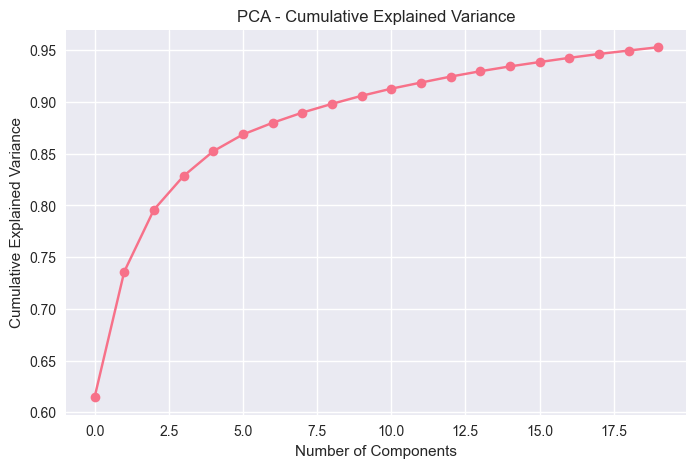

In [34]:
from sklearn.decomposition import PCA

# ⚡ Apply PCA after SMOTE
print("\n⚡ Applying PCA for dimensionality reduction...")

# Number of components to keep (you can adjust this or use 0.95 for 95% variance)
n_components = 0.95

# Initialize PCA
pca = PCA(n_components=n_components, random_state=42)

# Fit PCA on the augmented dataset
X_pca = pca.fit_transform(X_final)

# Get cumulative explained variance
explained_variance = pca.explained_variance_ratio_.cumsum()

print(f"✅ PCA applied. Reduced shape: {X_pca.shape}")
print(f"📊 Explained variance by {n_components} components: {explained_variance[-1]:.2%}")

# --- Visualization of PCA explained variance ---
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Final dataset for training after PCA
X_final_pca = X_pca
y_final_pca = y_final.copy()


In [35]:
x_test=pd.DataFrame(X_final_pca)

x_test.to_csv("X.csv", index=False)
# y_final_pca.to_csv("y_final_pca.csv", index=False)

In [36]:
print("🤖 Machine Learning Model Training:")

# Define models
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100, random_state=42, class_weight='balanced'
    ),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(
        random_state=42, max_iter=1000, class_weight='balanced'
    ),
    'SVM': SVC(
        random_state=42, probability=True, class_weight='balanced'
    )
}

# Storage for results
results = {}
model_predictions = {}
feature_importance = {}
trained_models = {}

print(f"\n🎯 Training models for each mental health disorder:")

# Train models for each target variable
for target in target_columns:
    if target in y_final.columns:
        print(f"\n{'='*70}")
        print(f"🎯 Training models for: {target}")
        print(f"{'='*70}")
        
        # Prepare target variable
        y = y_final[target].copy()
        
        # Handle missing values in target
        y = y.fillna(0)
        
        # Check class distribution
        class_dist = y.value_counts()
        print(f"Class distribution:")
        print(class_dist)
        
        if len(class_dist) < 2:
            print(f"⚠️ Skipping {target} - insufficient class variety")
            continue
            
        print(f"Number of classes: {len(class_dist)}")
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X_final, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"Training set size: {X_train.shape}")
        print(f"Test set size: {X_test.shape}")
        
        # Train and evaluate each model
        target_results = {}
        target_predictions = {}
        target_models = {}
        
        for model_name, model in models.items():
            print(f"\n🔄 Training {model_name}...")
            
            try:
                # Train the model
                model.fit(X_train, y_train)
                
                # Make predictions
                y_pred = model.predict(X_test)
                y_pred_proba = (
                    model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None
                )
                
                # ===== Metrics =====
                accuracy = accuracy_score(y_test, y_pred)

                # Precision, Recall, F1 (macro handles multiclass)
                precision, recall, f1, _ = precision_recall_fscore_support(
                    y_test, y_pred, average="macro", zero_division=0
                )
                
                # Safe AUC
                from sklearn.preprocessing import label_binarize
                try:
                    if y_pred_proba is not None:
                        n_classes = len(model.classes_)
                        if n_classes == 2:
                            # Binary case
                            auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
                        else:
                            # Multiclass case
                            y_test_bin = label_binarize(y_test, classes=model.classes_)
                            auc_score = roc_auc_score(
                                y_test_bin,
                                y_pred_proba,
                                multi_class="ovr",
                                average="weighted"
                            )
                    else:
                        auc_score = np.nan
                except Exception as e:
                    print(f"⚠️ Skipping AUC for {model_name} ({target}): {e}")
                    auc_score = np.nan
                
                # Cross-validation (macro F1 for multiclass)
                cv_scores = cross_val_score(
                    model, X_train, y_train, cv=5, scoring='f1_macro'
                )
                
                # Store results
                target_results[model_name] = {
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1_score': f1,
                    'auc_score': auc_score,
                    'cv_mean': cv_scores.mean(),
                    'cv_std': cv_scores.std()
                }
                
                target_predictions[model_name] = {
                    'y_test': y_test,
                    'y_pred': y_pred,
                    'y_pred_proba': y_pred_proba
                }
                
                target_models[model_name] = model
                
                # Extract feature importance
                if hasattr(model, 'feature_importances_'):
                    importances = model.feature_importances_
                    feature_importance[f"{target}_{model_name}"] = dict(
                        zip(X_final.columns, importances)
                    )
                elif hasattr(model, 'coef_'):
                    importances = np.abs(model.coef_[0])
                    feature_importance[f"{target}_{model_name}"] = dict(
                        zip(X_final.columns, importances)
                    )
                
                print(
                    f"✅ {model_name} - "
                    f"Accuracy: {accuracy:.3f}, "
                    f"F1: {f1:.3f}, "
                    f"AUC: {auc_score if not np.isnan(auc_score) else 'N/A'}"
                )
                
            except Exception as e:
                print(f"❌ Error training {model_name}: {str(e)}")
                continue
        
        # Store results for this target
        results[target] = target_results
        model_predictions[target] = target_predictions
        trained_models[target] = target_models

print(f"\n✅ Model training completed!")


🤖 Machine Learning Model Training:

🎯 Training models for each mental health disorder:

🎯 Training models for: Depression
Class distribution:
Depression
0    125
1    110
2     80
3     72
4     61
Name: count, dtype: int64
Number of classes: 5
Training set size: (358, 87)
Test set size: (90, 87)

🔄 Training Random Forest...
✅ Random Forest - Accuracy: 0.867, F1: 0.858, AUC: 0.9842541478129713

🔄 Training Gradient Boosting...
✅ Gradient Boosting - Accuracy: 0.822, F1: 0.799, AUC: 0.9705075845075845

🔄 Training Logistic Regression...
✅ Logistic Regression - Accuracy: 0.844, F1: 0.830, AUC: 0.9801974734915911

🔄 Training SVM...
✅ SVM - Accuracy: 0.756, F1: 0.736, AUC: 0.9540905702082172

🎯 Training models for: Anxiety
Class distribution:
Anxiety
0    182
1     95
2     89
3     82
Name: count, dtype: int64
Number of classes: 4
Training set size: (358, 87)
Test set size: (90, 87)

🔄 Training Random Forest...
✅ Random Forest - Accuracy: 0.878, F1: 0.851, AUC: 0.9766690005844271

🔄 Training

# 9. Model Evaluation and Comparison

In [37]:
print("📊 Model Evaluation and Comparison:")

# Create comprehensive results dataframe
comparison_data = []
for target, target_results in results.items():
    for model_name, metrics in target_results.items():
        comparison_data.append({
            'Target': target,
            'Model': model_name,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1_score'],
            'AUC': metrics['auc_score'],
            'CV_Mean': metrics['cv_mean'],
            'CV_Std': metrics['cv_std']
        })

if comparison_data:
    comparison_df = pd.DataFrame(comparison_data)
    print(f"\n📈 Model Performance Comparison:")
    print(comparison_df.round(3).to_string(index=False))
else:
    print("⚠️ No results available for comparison")

📊 Model Evaluation and Comparison:

📈 Model Performance Comparison:
             Target               Model  Accuracy  Precision  Recall  F1-Score   AUC  CV_Mean  CV_Std
         Depression       Random Forest     0.867      0.858   0.859     0.858 0.984    0.784   0.046
         Depression   Gradient Boosting     0.822      0.796   0.811     0.799 0.971    0.779   0.045
         Depression Logistic Regression     0.844      0.825   0.840     0.830 0.980    0.769   0.058
         Depression                 SVM     0.756      0.760   0.758     0.736 0.954    0.709   0.041
            Anxiety       Random Forest     0.878      0.853   0.856     0.851 0.977    0.817   0.042
            Anxiety   Gradient Boosting     0.856      0.825   0.827     0.822 0.971    0.816   0.025
            Anxiety Logistic Regression     0.778      0.723   0.739     0.727 0.952    0.771   0.014
            Anxiety                 SVM     0.744      0.719   0.716     0.710 0.916    0.617   0.033
Personally Dis

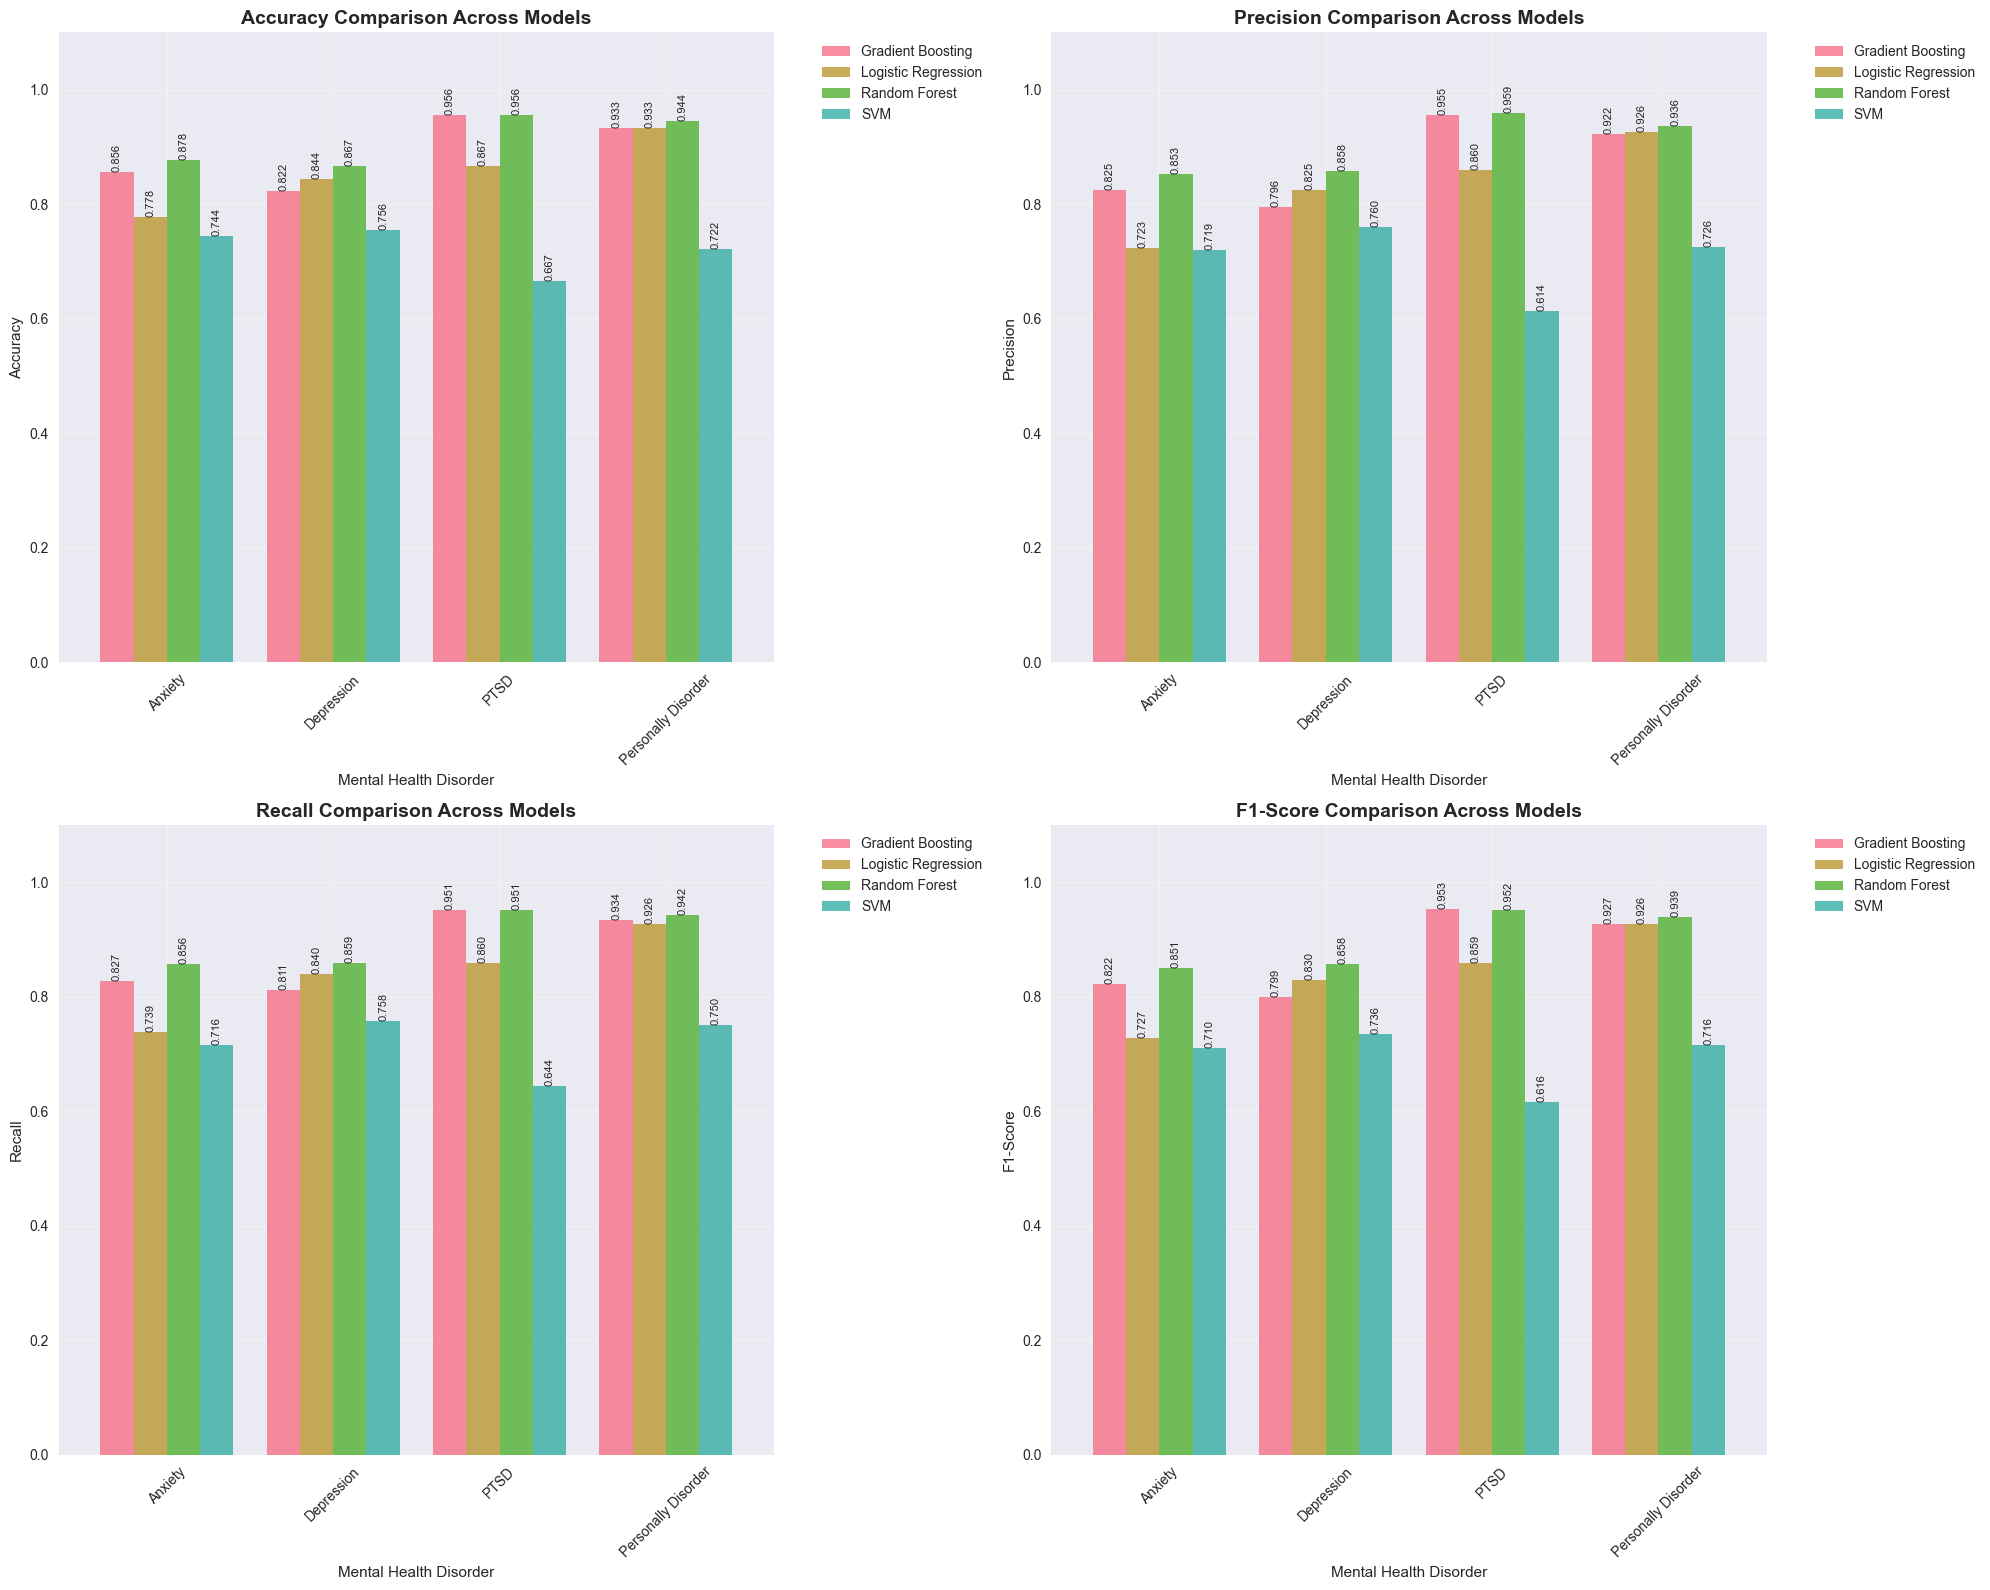

In [38]:
# Visualize model performance comparison
if comparison_data:
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    
    for i, metric in enumerate(metrics_to_plot):
        ax = axes[i//2, i%2]
        
        # Create pivot table for plotting
        pivot_data = comparison_df.pivot(index='Target', columns='Model', values=metric)
        
        # Create grouped bar chart
        pivot_data.plot(kind='bar', ax=ax, width=0.8, alpha=0.8)
        ax.set_title(f'{metric} Comparison Across Models', fontsize=14, fontweight='bold')
        ax.set_ylabel(metric)
        ax.set_xlabel('Mental Health Disorder')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0, 1.1)
        
        # Add value labels on bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.3f', fontsize=8, rotation=90)
    
    plt.tight_layout()
    plt.show()


🎯 Confusion Matrices for Best Performing Models:


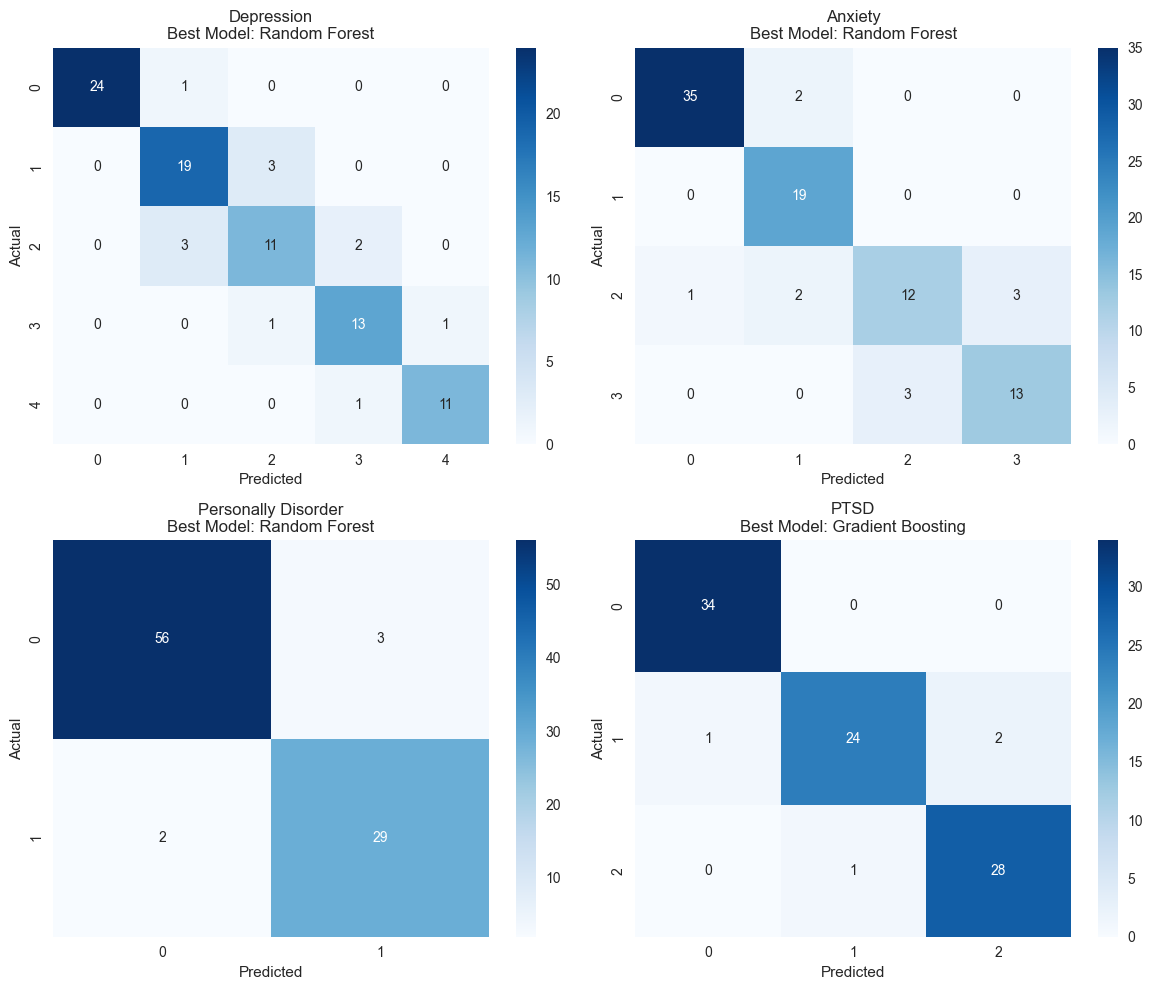

In [39]:
# Confusion matrices for best models
if results:
    print(f"\n🎯 Confusion Matrices for Best Performing Models:")
    
    # Determine number of available targets
    available_targets = list(results.keys())
    n_targets = len(available_targets)
    
    if n_targets > 0:
        # Create subplots based on available targets
        cols = min(2, n_targets)
        rows = (n_targets + 1) // 2
        
        fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
        if n_targets == 1:
            axes = [axes]
        elif rows == 1:
            axes = axes.reshape(1, -1)
        
        axes = axes.flatten() if n_targets > 1 else axes
        
        for i, target in enumerate(available_targets):
            if i < len(axes):
                # Find best model for this target (by F1 score)
                if target in results and results[target]:
                    best_model_info = max(
                        results[target].items(),
                        key=lambda x: x[1]['f1_score']
                    )
                    best_model_name = best_model_info[0]
                    
                    if best_model_name in model_predictions[target]:
                        y_test = model_predictions[target][best_model_name]['y_test']
                        y_pred = model_predictions[target][best_model_name]['y_pred']
                        
                        # Extract unique sorted labels
                        labels = sorted(list(set(y_test) | set(y_pred)))
                        
                        # Plot confusion matrix
                        cm = confusion_matrix(y_test, y_pred, labels=labels)
                        sns.heatmap(
                            cm,
                            annot=True,
                            fmt='d',
                            ax=axes[i],
                            cmap='Blues',
                            xticklabels=labels,
                            yticklabels=labels
                        )
                        axes[i].set_title(f'{target}\nBest Model: {best_model_name}')
                        axes[i].set_xlabel('Predicted')
                        axes[i].set_ylabel('Actual')
        
        # Hide unused subplots
        for j in range(i+1, len(axes)):
            axes[j].set_visible(False)
        
        plt.tight_layout()
        plt.show()



📈 ROC Curves for All Models:


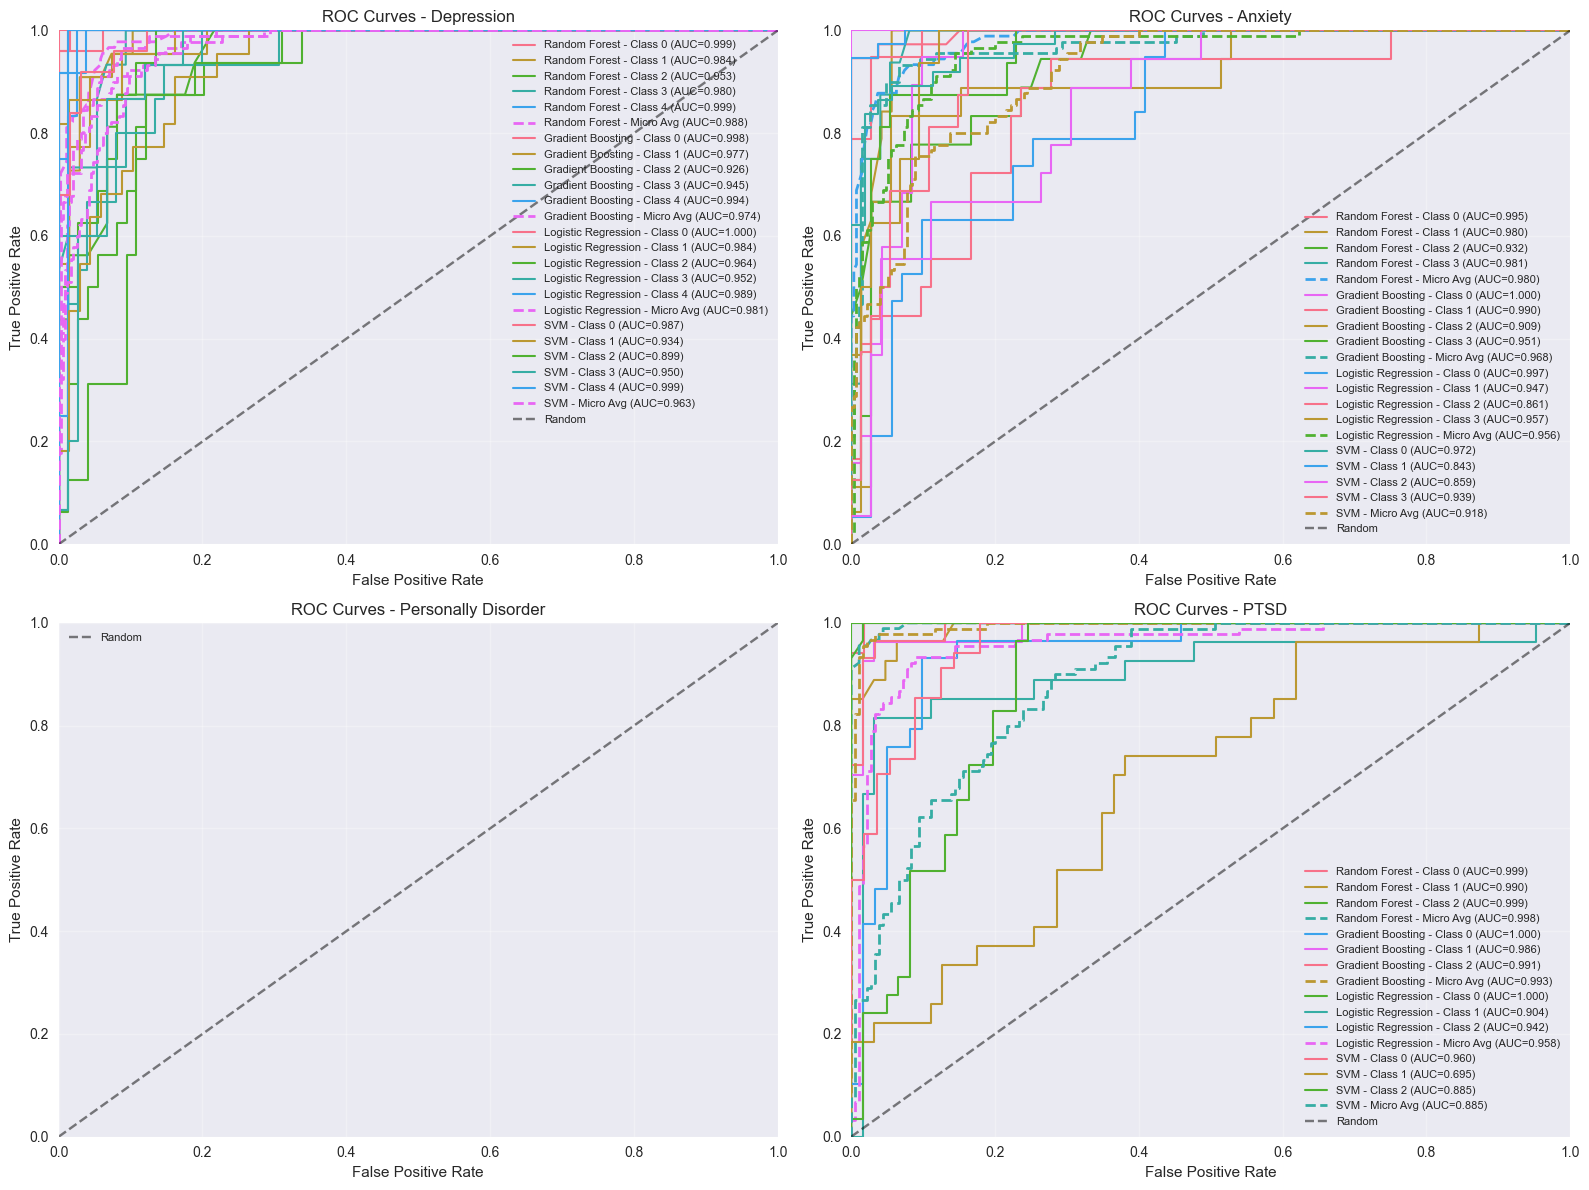

In [40]:
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# ROC Curves for all models
if results:
    print(f"\n📈 ROC Curves for All Models:")
    
    available_targets = list(results.keys())
    n_targets = len(available_targets)
    
    if n_targets > 0:
        cols = min(2, n_targets)
        rows = (n_targets + 1) // 2
        
        fig, axes = plt.subplots(rows, cols, figsize=(8*cols, 6*rows))
        if n_targets == 1:
            axes = [axes]
        elif rows == 1:
            axes = axes.reshape(1, -1)
        
        axes = axes.flatten() if n_targets > 1 else axes
        
        for i, target in enumerate(available_targets):
            if i < len(axes):
                ax = axes[i]
                
                # Plot ROC curve for each model
                for model_name in models.keys():
                    if (target in model_predictions and 
                        model_name in model_predictions[target]):
                        try:
                            y_test = model_predictions[target][model_name]['y_test']
                            y_pred_proba = model_predictions[target][model_name]['y_pred_proba']
                            
                            classes = np.unique(y_test)
                            
                            if len(classes) == 2:
                                # ✅ Binary case
                                fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
                                auc = roc_auc_score(y_test, y_pred_proba)
                                ax.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})', linewidth=2)
                            
                            else:
                                # ✅ Multi-class case
                                y_bin = label_binarize(y_test, classes=classes)
                                
                                # If model outputs proba for each class
                                if y_pred_proba.ndim == 1 or y_pred_proba.shape[1] == 1:
                                    continue  # skip invalid
                                
                                for j, class_label in enumerate(classes):
                                    fpr, tpr, _ = roc_curve(y_bin[:, j], y_pred_proba[:, j])
                                    auc = roc_auc_score(y_bin[:, j], y_pred_proba[:, j])
                                    ax.plot(
                                        fpr, tpr,
                                        label=f'{model_name} - Class {class_label} (AUC={auc:.3f})',
                                        linewidth=1.5
                                    )
                                
                                # Micro-average
                                fpr, tpr, _ = roc_curve(y_bin.ravel(), y_pred_proba.ravel())
                                auc = roc_auc_score(y_bin, y_pred_proba, average="micro")
                                ax.plot(fpr, tpr, linestyle='--', linewidth=2,
                                        label=f'{model_name} - Micro Avg (AUC={auc:.3f})')
                        except Exception as e:
                            continue
                
                ax.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random')
                ax.set_xlabel('False Positive Rate')
                ax.set_ylabel('True Positive Rate')
                ax.set_title(f'ROC Curves - {target}')
                ax.legend(fontsize=8)
                ax.grid(True, alpha=0.3)
                ax.set_xlim([0, 1])
                ax.set_ylim([0, 1])
        
        # Hide unused subplots
        for j in range(i+1, len(axes)):
            axes[j].set_visible(False)
        
        plt.tight_layout()
        plt.show()


# 10. Feature Importance Analysis

⭐ Feature Importance Analysis:

🎯 Feature Importance for Depression:


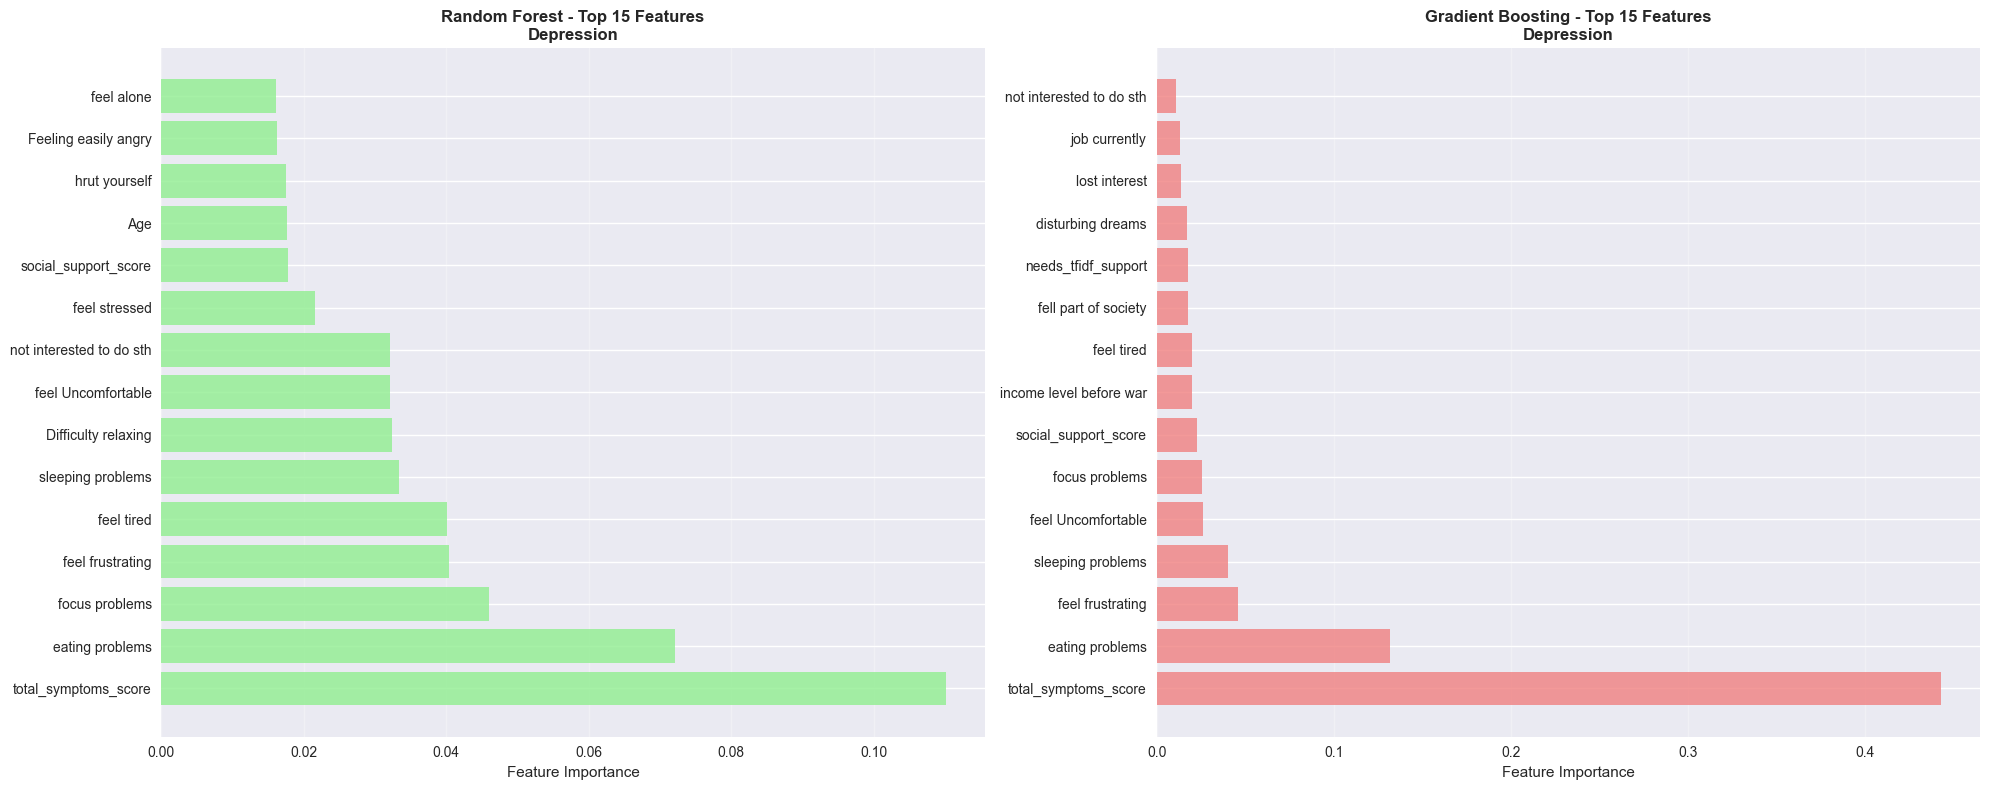


🎯 Feature Importance for Anxiety:


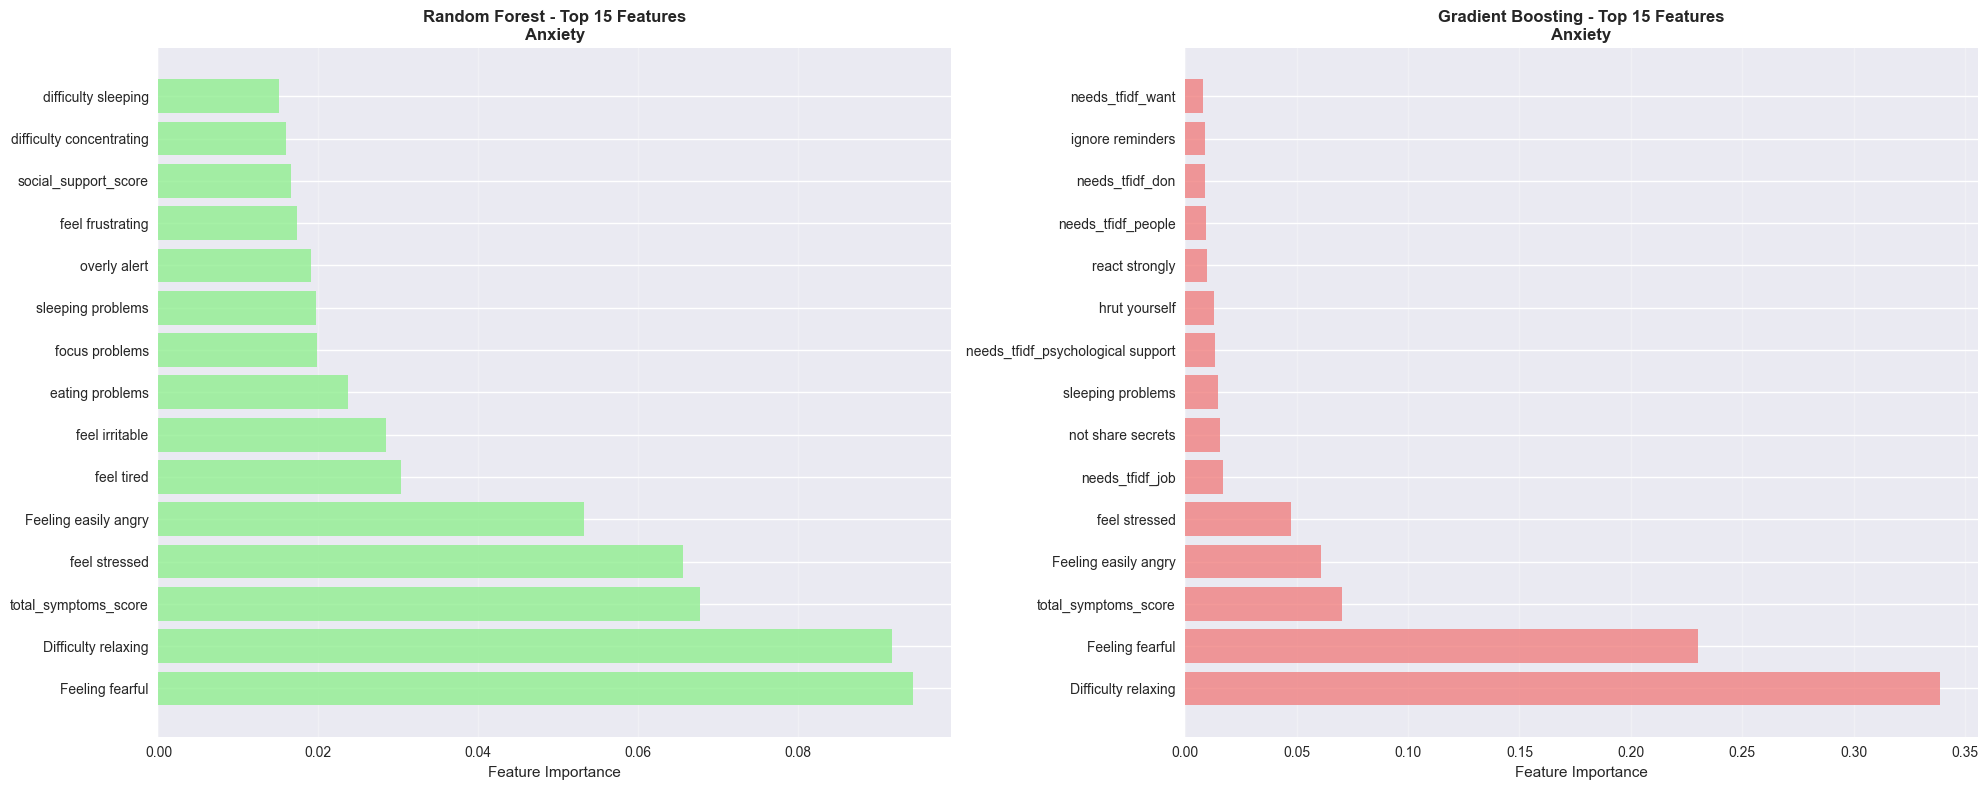


🎯 Feature Importance for Personally Disorder:


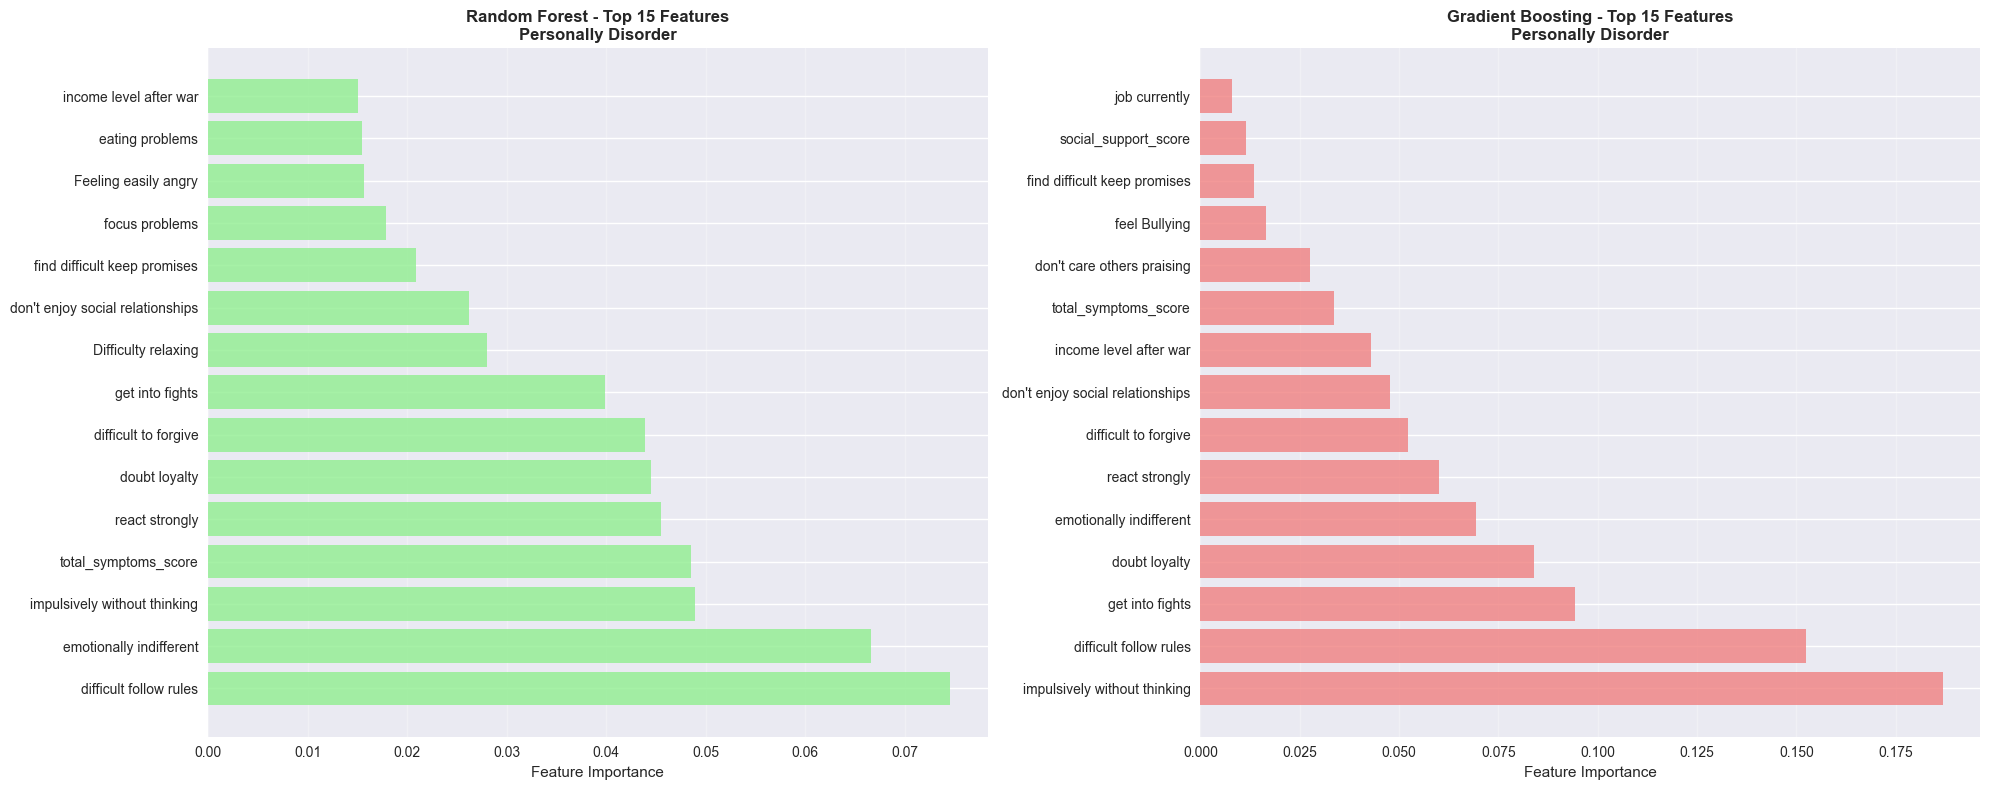


🎯 Feature Importance for PTSD:


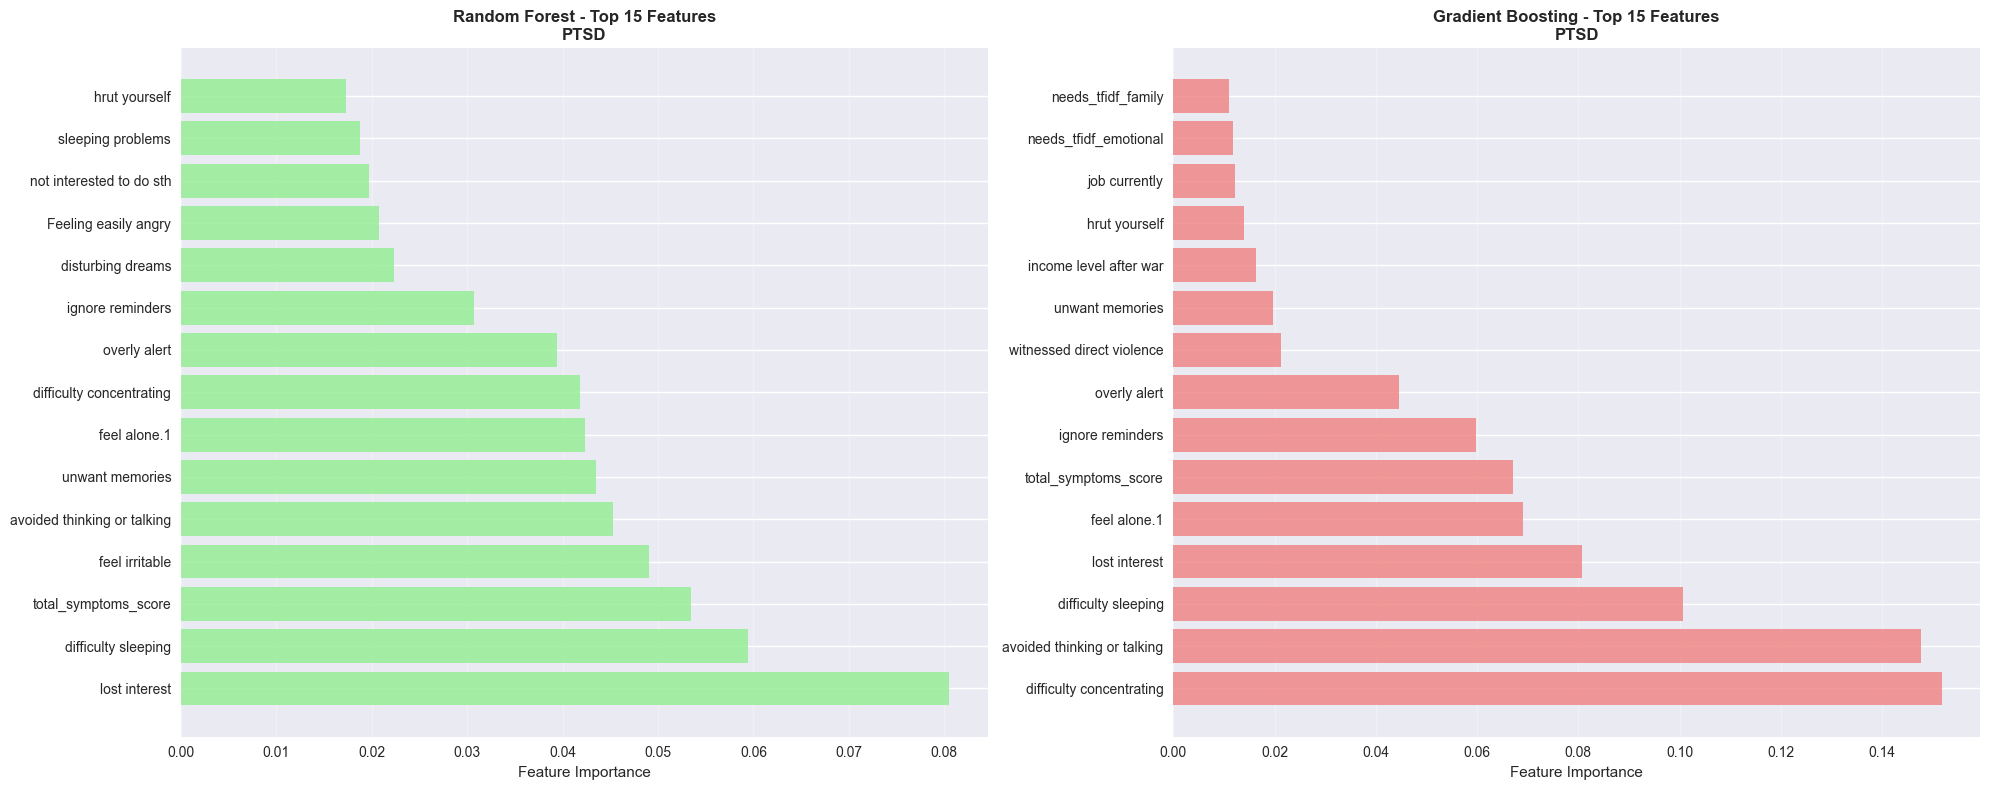

In [41]:
print("⭐ Feature Importance Analysis:")

if feature_importance:
    # Analyze feature importance for each target
    for target in target_columns:
        if target in results:
            print(f"\n🎯 Feature Importance for {target}:")
            
            # Get Random Forest and Gradient Boosting importance if available
            rf_key = f"{target}_Random Forest"
            gb_key = f"{target}_Gradient Boosting"
            
            fig, axes = plt.subplots(1, 2, figsize=(20, 8))
            
            # Random Forest importance
            if rf_key in feature_importance:
                importances = feature_importance[rf_key]
                top_features = dict(sorted(importances.items(), key=lambda x: x[1], reverse=True)[:15])
                
                y_pos = np.arange(len(top_features))
                axes[0].barh(y_pos, list(top_features.values()), color='lightgreen', alpha=0.8)
                axes[0].set_yticks(y_pos)
                axes[0].set_yticklabels(list(top_features.keys()))
                axes[0].set_title(f'Random Forest - Top 15 Features\n{target}', fontweight='bold')
                axes[0].set_xlabel('Feature Importance')
                axes[0].grid(True, alpha=0.3, axis='x')
            
            # Gradient Boosting importance
            if gb_key in feature_importance:
                importances = feature_importance[gb_key]
                top_features = dict(sorted(importances.items(), key=lambda x: x[1], reverse=True)[:15])
                
                y_pos = np.arange(len(top_features))
                axes[1].barh(y_pos, list(top_features.values()), color='lightcoral', alpha=0.8)
                axes[1].set_yticks(y_pos)
                axes[1].set_yticklabels(list(top_features.keys()))
                axes[1].set_title(f'Gradient Boosting - Top 15 Features\n{target}', fontweight='bold')
                axes[1].set_xlabel('Feature Importance')
                axes[1].grid(True, alpha=0.3, axis='x')
            
            plt.tight_layout()
            plt.show()


🌍 Global Feature Importance Analysis:

⭐ Top 20 Most Important Features (Global Average):
 1. react strongly                      | Importance: 0.2949
 2. emotionally indifferent             | Importance: 0.2685
 3. Difficulty relaxing                 | Importance: 0.2302
 4. ignore reminders                    | Importance: 0.2289
 5. total_symptoms_score                | Importance: 0.2276
 6. don't enjoy social relationships    | Importance: 0.2269
 7. Feeling fearful                     | Importance: 0.2222
 8. focus problems                      | Importance: 0.2219
 9. difficult to forgive                | Importance: 0.2162
10. get into fights                     | Importance: 0.2111
11. impulsively without thinking        | Importance: 0.2102
12. feel stressed                       | Importance: 0.2065
13. doubt loyalty                       | Importance: 0.2046
14. Feeling easily angry                | Importance: 0.1984
15. feel tired                          | Importance: 0

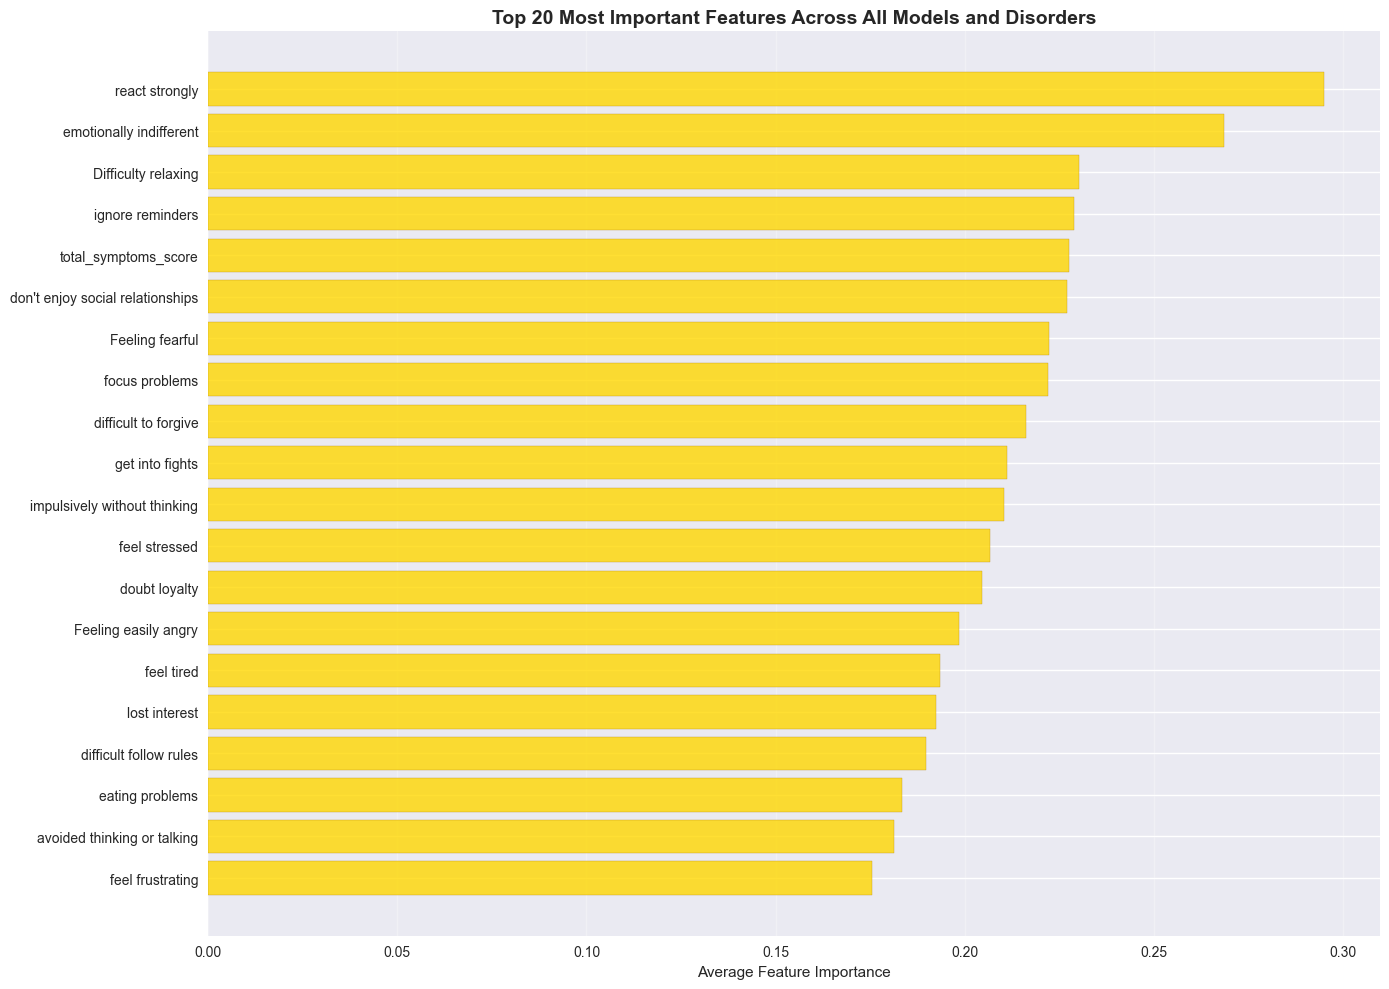

In [42]:
# Global feature importance analysis
if feature_importance:
    print(f"\n🌍 Global Feature Importance Analysis:")
    
    # Aggregate importance across all models and targets
    all_importances = {}
    for key, importances in feature_importance.items():
        for feature, importance in importances.items():
            if feature not in all_importances:
                all_importances[feature] = []
            all_importances[feature].append(importance)
    
    # Calculate average importance
    avg_importances = {feature: np.mean(scores) for feature, scores in all_importances.items()}
    top_global_features = dict(sorted(avg_importances.items(), key=lambda x: x[1], reverse=True)[:20])
    
    print(f"\n⭐ Top 20 Most Important Features (Global Average):")
    for i, (feature, importance) in enumerate(top_global_features.items(), 1):
        print(f"{i:2d}. {feature:<35} | Importance: {importance:.4f}")
    
    # Visualize global feature importance
    plt.figure(figsize=(14, 10))
    y_pos = np.arange(len(top_global_features))
    plt.barh(y_pos, list(top_global_features.values()), color='gold', alpha=0.8, edgecolor='darkgoldenrod')
    plt.yticks(y_pos, list(top_global_features.keys()))
    plt.xlabel('Average Feature Importance')
    plt.title('Top 20 Most Important Features Across All Models and Disorders', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()

# 11. Hyperparameter Tuning

In [43]:
print("🎛️ Hyperparameter Tuning for Best Models:")

if results:
    # Find the target with best overall performance
    target_scores = {}
    for target, target_results in results.items():
        avg_f1 = np.mean([metrics['f1_score'] for metrics in target_results.values()])
        target_scores[target] = avg_f1
    
    best_target = max(target_scores.items(), key=lambda x: x[1])[0]
    print(f"📊 Tuning hyperparameters for: {best_target}")
    
    if best_target in df_numeric.columns:
        # Prepare data for tuning
        y = df_numeric[best_target].fillna(0)
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"\n🌲 Random Forest Hyperparameter Tuning:")
        
        # Random Forest parameter grid
        rf_params = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced']
        }
        
        # Grid search
        rf_grid = GridSearchCV(
            RandomForestClassifier(random_state=42),
            rf_params,
            cv=5,
            scoring='f1',
            n_jobs=-1,
            verbose=1
        )
        
        rf_grid.fit(X_train, y_train)
        
        print(f"✅ Best Random Forest parameters: {rf_grid.best_params_}")
        print(f"✅ Best CV F1 score: {rf_grid.best_score_:.3f}")
        
        # Evaluate tuned model
        best_rf = rf_grid.best_estimator_
        y_pred_tuned = best_rf.predict(X_test)
        y_pred_proba_tuned = best_rf.predict_proba(X_test)[:, 1]
        
        # Performance metrics
        accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
        precision_tuned, recall_tuned, f1_tuned, _ = precision_recall_fscore_support(
            y_test, y_pred_tuned, average='binary'
        )
        auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
        
        print(f"\n📈 Tuned Model Performance on Test Set:")
        print(f"Accuracy: {accuracy_tuned:.3f}")
        print(f"Precision: {precision_tuned:.3f}")
        print(f"Recall: {recall_tuned:.3f}")
        print(f"F1-Score: {f1_tuned:.3f}")
        print(f"AUC: {auc_tuned:.3f}")
        
        print(f"\n📋 Detailed Classification Report:")
        print(classification_report(y_test, y_pred_tuned, target_names=['Normal', 'Affected']))


🎛️ Hyperparameter Tuning for Best Models:
📊 Tuning hyperparameters for: Personally Disorder

🌲 Random Forest Hyperparameter Tuning:
Fitting 5 folds for each of 81 candidates, totalling 405 fits
✅ Best Random Forest parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
✅ Best CV F1 score: 0.923

📈 Tuned Model Performance on Test Set:
Accuracy: 0.951
Precision: 1.000
Recall: 0.909
F1-Score: 0.952
AUC: 0.990

📋 Detailed Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      1.00      0.95        19
    Affected       1.00      0.91      0.95        22

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.96      0.95      0.95        41



# 12. Model Interpretability and Insights


In [44]:
print("🔍 Model Interpretability and Key Insights:")

# Clinical insights based on feature importance
if feature_importance:
    print(f"\n🏥 Clinical Insights:")
    
    # Analyze most important features across all models
    all_importances = {}
    for key, importances in feature_importance.items():
        for feature, importance in importances.items():
            if feature not in all_importances:
                all_importances[feature] = []
            all_importances[feature].append(importance)
    
    avg_importances = {feature: np.mean(scores) for feature, scores in all_importances.items()}
    top_features = sorted(avg_importances.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print(f"\n🎯 Top 10 Predictive Factors for Mental Health Disorders:")
    for i, (feature, importance) in enumerate(top_features, 1):
        print(f"{i:2d}. {feature}")
    
    # Categorize features by type
    trauma_features = []
    symptom_features = []
    social_features = []
    demographic_features = []
    
    for feature, importance in top_features:
        feature_lower = feature.lower()
        if any(word in feature_lower for word in ['violence', 'trauma', 'arrested', 'property', 'lost']):
            trauma_features.append(feature)
        elif any(word in feature_lower for word in ['feel', 'sleep', 'stress', 'tired', 'eating', 'focus']):
            symptom_features.append(feature)
        elif any(word in feature_lower for word in ['alone', 'talk', 'friends', 'social', 'family']):
            social_features.append(feature)
        else:
            demographic_features.append(feature)
    
    print(f"\n📊 Feature Categories:")
    print(f"🏥 Trauma-related: {trauma_features}")
    print(f"😟 Symptom-related: {symptom_features}")
    print(f"👥 Social-related: {social_features}")
    print(f"📋 Demographic: {demographic_features}")

🔍 Model Interpretability and Key Insights:

🏥 Clinical Insights:

🎯 Top 10 Predictive Factors for Mental Health Disorders:
 1. react strongly
 2. emotionally indifferent
 3. Difficulty relaxing
 4. ignore reminders
 5. total_symptoms_score
 6. don't enjoy social relationships
 7. Feeling fearful
 8. focus problems
 9. difficult to forgive
10. get into fights

📊 Feature Categories:
🏥 Trauma-related: []
😟 Symptom-related: ['Feeling fearful', 'focus problems']
👥 Social-related: ["don't enjoy social relationships"]
📋 Demographic: ['react strongly', 'emotionally indifferent', 'Difficulty relaxing', 'ignore reminders', 'total_symptoms_score', 'difficult to forgive', 'get into fights']


In [45]:
# Performance summary and recommendations
if results:
    print(f"\n📈 Performance Summary by Disorder:")
    
    for target in target_columns:
        if target in results and results[target]:
            best_model = max(results[target].items(), key=lambda x: x[1]['f1_score'])
            best_model_name, best_metrics = best_model
            
            print(f"\n{target}:")
            print(f"  📊 Best Model: {best_model_name}")
            print(f"  🎯 Accuracy: {best_metrics['accuracy']:.3f}")
            print(f"  📈 F1-Score: {best_metrics['f1_score']:.3f}")
            print(f"  🔄 Cross-validation: {best_metrics['cv_mean']:.3f} (±{best_metrics['cv_std']:.3f})")
            
            # Determine performance level
            f1_score = best_metrics['f1_score']
            if f1_score >= 0.8:
                performance = "Excellent"
            elif f1_score >= 0.7:
                performance = "Good"
            elif f1_score >= 0.6:
                performance = "Fair"
            else:
                performance = "Needs Improvement"
            
            print(f"  💡 Performance Level: {performance}")
            


📈 Performance Summary by Disorder:

Depression:
  📊 Best Model: Random Forest
  🎯 Accuracy: 0.867
  📈 F1-Score: 0.858
  🔄 Cross-validation: 0.784 (±0.046)
  💡 Performance Level: Excellent

Anxiety:
  📊 Best Model: Random Forest
  🎯 Accuracy: 0.878
  📈 F1-Score: 0.851
  🔄 Cross-validation: 0.817 (±0.042)
  💡 Performance Level: Excellent

Personally Disorder:
  📊 Best Model: Random Forest
  🎯 Accuracy: 0.944
  📈 F1-Score: 0.939
  🔄 Cross-validation: 0.920 (±0.047)
  💡 Performance Level: Excellent

PTSD:
  📊 Best Model: Gradient Boosting
  🎯 Accuracy: 0.956
  📈 F1-Score: 0.953
  🔄 Cross-validation: 0.879 (±0.051)
  💡 Performance Level: Excellent


# 13. Final Summary and Recommendations

In [46]:
print("📋 FINAL SUMMARY AND RECOMMENDATIONS")
print("=" * 80)

# Dataset summary
print(f"\n📊 Dataset Summary:")
print(f"• Total participants: {len(df)}")
print(f"• Age range: {df['Age'].min()} - {df['Age'].max()} years (Mean: {df['Age'].mean():.1f})")
print(f"• Gender distribution: {(df['Gender'] == 'Female').mean()*100:.1f}% Female")
print(f"• Features used for modeling: {len(feature_columns)}")

# Disorder prevalence
print(f"\n🏥 Mental Health Disorder Prevalence:")
for target in target_columns:
    if target in df_numeric.columns:
        prevalence = df_numeric[target].mean() * 100
        print(f"• {target}: {prevalence:.1f}%")

# Model performance summary
if results:
    print(f"\n🤖 Model Performance Summary:")
    
    # Overall best model
    all_f1_scores = []
    model_performance = {}
    
    for target, target_results in results.items():
        for model_name, metrics in target_results.items():
            if model_name not in model_performance:
                model_performance[model_name] = []
            model_performance[model_name].append(metrics['f1_score'])
            all_f1_scores.append(metrics['f1_score'])
    
    avg_model_performance = {model: np.mean(scores) for model, scores in model_performance.items()}
    best_overall_model = max(avg_model_performance.items(), key=lambda x: x[1])
    
    print(f"• Best overall model: {best_overall_model[0]} (Avg F1: {best_overall_model[1]:.3f})")
    print(f"• Average F1-score across all models: {np.mean(all_f1_scores):.3f}")

📋 FINAL SUMMARY AND RECOMMENDATIONS

📊 Dataset Summary:
• Total participants: 201
• Age range: 19 - 35 years (Mean: 26.2)
• Gender distribution: 66.2% Female
• Features used for modeling: 86

🏥 Mental Health Disorder Prevalence:
• Depression: 210.4%
• Anxiety: 161.2%
• Personally Disorder: 53.7%
• PTSD: 136.3%

🤖 Model Performance Summary:
• Best overall model: Random Forest (Avg F1: 0.900)
• Average F1-score across all models: 0.826


In [47]:
# Key findings
print(f"\n💡 Key Findings:")
if feature_importance:
    top_3_features = list(sorted(avg_importances.items(), key=lambda x: x[1], reverse=True)[:3])
    print(f"• Most predictive factors:")
    for i, (feature, _) in enumerate(top_3_features, 1):
        print(f"  {i}. {feature}")

print(f"• Machine learning models can predict mental health disorders with varying success")
print(f"• Feature engineering and proper data preprocessing are crucial for model performance")



💡 Key Findings:
• Most predictive factors:
  1. react strongly
  2. emotionally indifferent
  3. Difficulty relaxing
• Machine learning models can predict mental health disorders with varying success
• Feature engineering and proper data preprocessing are crucial for model performance


In [48]:
# Recommendations
print(f"\n🎯 Recommendations:")
print(f"1. DATA COLLECTION:")
print(f"   • Increase sample size for better model generalization")
print(f"   • Collect more balanced datasets (equal representation of affected/non-affected)")
print(f"   • Include additional clinical assessment scores")

print(f"\n2. MODEL IMPROVEMENTS:")
print(f"   • Implement ensemble methods combining multiple algorithms")
print(f"   • Apply advanced techniques like SMOTE for handling class imbalance")
print(f"   • Consider deep learning approaches for complex pattern recognition")

print(f"\n3. CLINICAL APPLICATIONS:")
print(f"   • Use models as screening tools, not diagnostic instruments")
print(f"   • Implement regular model retraining with new data")
print(f"   • Validate models on independent clinical populations")

print(f"\n4. FEATURE ENGINEERING:")
print(f"   • Create more sophisticated composite scores")
print(f"   • Include temporal features (symptom duration, progression)")
print(f"   • Incorporate social determinants of mental health")

print(f"\n5. VALIDATION:")
print(f"   • Conduct external validation studies")
print(f"   • Assess model fairness across different demographic groups")
print(f"   • Monitor model performance drift over time")

print(f"\n✅ ANALYSIS COMPLETED SUCCESSFULLY!")
print(f"📊 All models trained and evaluated")
print(f"🎯 Feature importance analyzed")
print(f"📈 Performance metrics calculated")
print(f"💡 Clinical insights extracted")

print("\n" + "=" * 80)
print("🏁 END OF MENTAL HEALTH ML ANALYSIS NOTEBOOK")
print("=" * 80)


🎯 Recommendations:
1. DATA COLLECTION:
   • Increase sample size for better model generalization
   • Collect more balanced datasets (equal representation of affected/non-affected)
   • Include additional clinical assessment scores

2. MODEL IMPROVEMENTS:
   • Implement ensemble methods combining multiple algorithms
   • Apply advanced techniques like SMOTE for handling class imbalance
   • Consider deep learning approaches for complex pattern recognition

3. CLINICAL APPLICATIONS:
   • Use models as screening tools, not diagnostic instruments
   • Implement regular model retraining with new data
   • Validate models on independent clinical populations

4. FEATURE ENGINEERING:
   • Create more sophisticated composite scores
   • Include temporal features (symptom duration, progression)
   • Incorporate social determinants of mental health

5. VALIDATION:
   • Conduct external validation studies
   • Assess model fairness across different demographic groups
   • Monitor model performan

In [49]:
import joblib
import os

# Create folder if not exists
os.makedirs("saved_models", exist_ok=True)

# Define the best models you found
best_models = {
    "Depression": {"name": "LogisticRegression", "model": trained_models["Depression"]["Logistic Regression"]},
    "Anxiety": {"name": "RandomForest", "model": trained_models["Anxiety"]["Random Forest"]},
    "PersonallyDisorder": {"name": "RandomForest", "model": trained_models["Personally Disorder"]["Random Forest"]},
    "PTSD": {"name": "RandomForest", "model": trained_models["PTSD"]["Random Forest"]}
}

# Save each best model
for target, info in best_models.items():
    model = info["model"]
    model_name = info["name"]
    model_filename = f"saved_models/{target}_{model_name}.joblib"
    joblib.dump(model, model_filename)
    print(f"💾 Best model for {target} ({model_name}) saved at: {model_filename}")


💾 Best model for Depression (LogisticRegression) saved at: saved_models/Depression_LogisticRegression.joblib
💾 Best model for Anxiety (RandomForest) saved at: saved_models/Anxiety_RandomForest.joblib
💾 Best model for PersonallyDisorder (RandomForest) saved at: saved_models/PersonallyDisorder_RandomForest.joblib
💾 Best model for PTSD (RandomForest) saved at: saved_models/PTSD_RandomForest.joblib


In [51]:
import nbformat

# Load your notebook with UTF-8 encoding
notebook_path = "Full Notebook.ipynb"
with open(notebook_path, encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

imports = set()

for cell in nb.cells:
    if cell.cell_type == "code":
        for line in cell.source.splitlines():
            line = line.strip()
            if line.startswith("import ") or line.startswith("from "):
                pkg = line.split()[1].split(".")[0]
                if pkg not in ["os", "re", "sys"]:  # stdlib, skip
                    imports.add(pkg)

print("requirements.txt candidates:")
for pkg in sorted(imports):
    print(pkg)


requirements.txt candidates:
imblearn
itertools
joblib
matplotlib
nbformat
numpy
pandas
seaborn
sklearn
warnings
